# tuiautopilotml package demo 


In [ ]:
#-----------
# Libraries 
#-----------

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

## Generate datasets
At this stage we will generate datasets that we will use through the demo 

In [ ]:
#----------------------------------------
# External datasets - Regression dataset
#----------------------------------------

from sklearn.datasets import make_regression

In [ ]:
n_samples, n_features = 1000, 20
rng = np.random.RandomState(0)

# We will genereate a regression dataset using sklearn 

X, y  = make_regression(n_samples=1000, n_features=20, random_state=rng)

In [ ]:
sklearn_reg = pd.DataFrame(X)
sklearn_reg['y_label'] = y 

In [ ]:
print(sklearn_reg.shape)
sklearn_reg.head()

(1000, 21)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,y_label
0,-0.069569,-1.449855,0.769006,1.029079,-1.924100,0.738182,0.050648,0.431314,-0.140589,2.250977,...,1.232522,0.426923,-0.686352,-0.514991,-0.043792,1.592111,1.286825,1.206873,-1.385308,57.998102
1,0.164913,-1.405967,0.836636,-0.288131,-1.410823,-0.114962,0.495851,-1.394840,0.405080,-1.274319,...,0.795550,1.179420,0.711785,0.273729,-0.307068,-0.937948,0.129555,0.138745,-1.402331,-144.044388
2,-0.368782,-0.716642,1.698623,-0.387573,0.493682,2.195156,0.215677,2.190078,-0.038940,0.740299,...,1.270354,-1.320544,1.223768,0.899885,-2.001396,0.326204,1.381349,-0.961049,0.596878,-61.471866
3,-0.993124,0.003771,0.339965,0.841631,0.280442,-0.206904,0.880179,0.643314,-1.128011,0.160928,...,-1.570623,0.931848,-0.249459,0.493837,-0.394850,0.049495,0.698457,-0.015682,-0.190653,-18.784091
4,-1.580732,-0.901989,-0.450676,1.368374,-0.604567,0.091259,0.571180,0.054684,-0.761465,-1.015132,...,-0.215548,-0.054830,-0.708785,-1.113764,0.645437,-0.536059,-0.074344,0.710070,1.871829,-45.128668


## tuiautopilotml.database (edit this section)
This section contains database related functions 

In [ ]:
import taberspilotml.connectors as cn

### extract_data_to_df()
This function loads data from databases and return a pandas dataframe 

In [ ]:
#-------------------
# Example using TAP 
#-------------------
snow_flake_extract1 = db.extract_data_to_df(mode='from_database', 
                                            type_of_connection='snowflake', 
                                            save_to_csv=False, 
                                            use_tap=True, 
                                            data_source_name='clv_uk' )

In [ ]:
#--------------------------
# Example using own machine 
#--------------------------
snow_flake_extract1 = db.extract_data_to_df(mode='from_database', 
                                            type_of_connection='snowflake', 
                                            save_to_csv=False, 
                                            use_tap=True, 
                                            data_source_name='clv_uk' )
config_example = { 'account':'vu66182.eu-central-1',
        'user':'your_email_adress' ,
        'database': 'SDX04_DB_CDS_DATASCIENCE',
        'schema':'your_dev_env',
        'warehouse':'SDX04_WH_CDS_DATASCIENCE',
        'role': 'SDX04_ROLE_CDS_DATASCIENCE_ANALYST',
        'authenticator'='externalbrowser'}

snow_flake_extract2 = db.extract_data_to_df(mode='from_database', 
                                            type_of_connection='snowflake', 
                                            save_to_csv=False, 
                                            use_tap=False, 
                                            **config_example )

### from_pandas_to_snowflake()
This function writes data to SnowFlake 

In [ ]:
#-------------------
# Example using TAP 
#-------------------

from_pandas_to_snowflake(df=reg_raw, 
                         use_tap=True,
                         data_source_name='clv_uk', 
                         table_name='my_results')

In [ ]:
#--------------------------
# Example using own machine 
#--------------------------

config_example = { 'account':'vu66182.eu-central-1',
        'user':'your_email_adress' ,
        'database': 'SDX04_DB_CDS_DATASCIENCE',
        'schema':'your_dev_env',
        'warehouse':'SDX04_WH_CDS_DATASCIENCE',
        'role': 'SDX04_ROLE_CDS_DATASCIENCE_ANALYST',
        'authenticator'='externalbrowser'}

from_pandas_to_snowflake(df=reg_raw, 
                         engine_config=config_example, 
                         use_tap=False,
                         table_name='my_results')

## tuiautopilotml.preprocessing

### dataframe_transformation()

In [ ]:
from taberspilotml.preprocessing import dataframe_transformation

In [ ]:
sklearn_reg.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,y_label
0,-0.069569,-1.449855,0.769006,1.029079,-1.924100,0.738182,0.050648,0.431314,-0.140589,2.250977,...,1.232522,0.426923,-0.686352,-0.514991,-0.043792,1.592111,1.286825,1.206873,-1.385308,57.998102
1,0.164913,-1.405967,0.836636,-0.288131,-1.410823,-0.114962,0.495851,-1.394840,0.405080,-1.274319,...,0.795550,1.179420,0.711785,0.273729,-0.307068,-0.937948,0.129555,0.138745,-1.402331,-144.044388
2,-0.368782,-0.716642,1.698623,-0.387573,0.493682,2.195156,0.215677,2.190078,-0.038940,0.740299,...,1.270354,-1.320544,1.223768,0.899885,-2.001396,0.326204,1.381349,-0.961049,0.596878,-61.471866
3,-0.993124,0.003771,0.339965,0.841631,0.280442,-0.206904,0.880179,0.643314,-1.128011,0.160928,...,-1.570623,0.931848,-0.249459,0.493837,-0.394850,0.049495,0.698457,-0.015682,-0.190653,-18.784091
4,-1.580732,-0.901989,-0.450676,1.368374,-0.604567,0.091259,0.571180,0.054684,-0.761465,-1.015132,...,-0.215548,-0.054830,-0.708785,-1.113764,0.645437,-0.536059,-0.074344,0.710070,1.871829,-45.128668


In [ ]:
cols_to_exclude = [1, 2]
formatted_df = dataframe_transformation(df=sklearn_reg, 
                                        cols_to_exclude=cols_to_exclude, 
                                        drop_missing_cols=True,
                                        drop_missing_rows=False, 
                                        object_is_numerical_cols=None)

Dropping cols to exclude
convert_to_int_float_date DONE
Converting columns to lowercase
Ran 3 checks on the dataframe
All the checks were passed..
Your dataframe seems to be correct. We return the original input data


In [ ]:
# Here we can see the formatted version of our dataset with no nan values

print(formatted_df.isnull().sum().any())
formatted_df.head()

False


,0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,y_label
0,-0.069569,1.029079,-1.924100,0.738182,0.050648,0.431314,-0.140589,2.250977,0.508393,1.232522,0.426923,-0.686352,-0.514991,-0.043792,1.592111,1.286825,1.206873,-1.385308,57.998102
1,0.164913,-0.288131,-1.410823,-0.114962,0.495851,-1.394840,0.405080,-1.274319,-1.713915,0.795550,1.179420,0.711785,0.273729,-0.307068,-0.937948,0.129555,0.138745,-1.402331,-144.044388
2,-0.368782,-0.387573,0.493682,2.195156,0.215677,2.190078,-0.038940,0.740299,1.507576,1.270354,-1.320544,1.223768,0.899885,-2.001396,0.326204,1.381349,-0.961049,0.596878,-61.471866
3,-0.993124,0.841631,0.280442,-0.206904,0.880179,0.643314,-1.128011,0.160928,-0.267734,-1.570623,0.931848,-0.249459,0.493837,-0.394850,0.049495,0.698457,-0.015682,-0.190653,-18.784091
4,-1.580732,1.368374,-0.604567,0.091259,0.571180,0.054684,-0.761465,-1.015132,-1.471651,-0.215548,-0.054830,-0.708785,-1.113764,0.645437,-0.536059,-0.074344,0.710070,1.871829,-45.128668


# Analytics

## tuiautopilotml.eda

### initial_eda_wrapper()
This function will return the status of our dataset like counts, distributions, outliers 

In [ ]:
from taberspilotml.analytics.eda import initial_eda_wrapper

Checking imbalance degree...
It looks like your input data contains too many categories
Generating initial graphs...
Count plots


<Figure size 1008x3456 with 0 Axes>

Correlation between variables


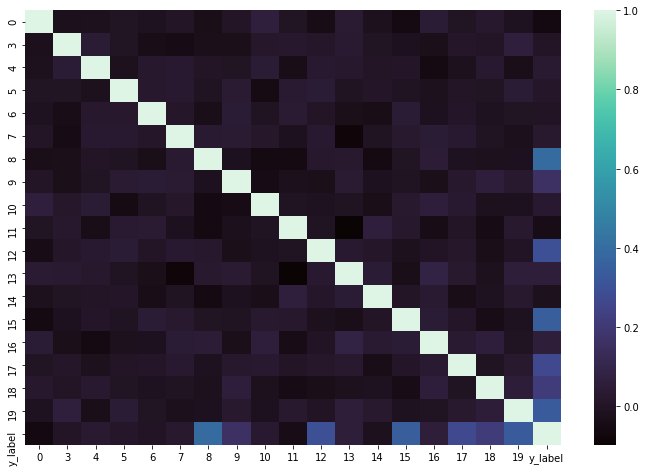

Distribution and outlier detection


INFO:numexpr.utils:NumExpr defaulting to 4 threads.


KeyboardInterrupt: 

In [ ]:
initial_eda_wrapper(df=formatted_df, 
                        target_label='y_label', 
                        summary_report=True, 
                        return_outliers=True,
                        save_figures=False)

## taberspilotml.analytics.pca

In [ ]:
from taberspilotml.analytics.pca import PCAAnalytics

In [ ]:
pca_case = PCAAnalytics(df=formatted_df , method='eig')

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


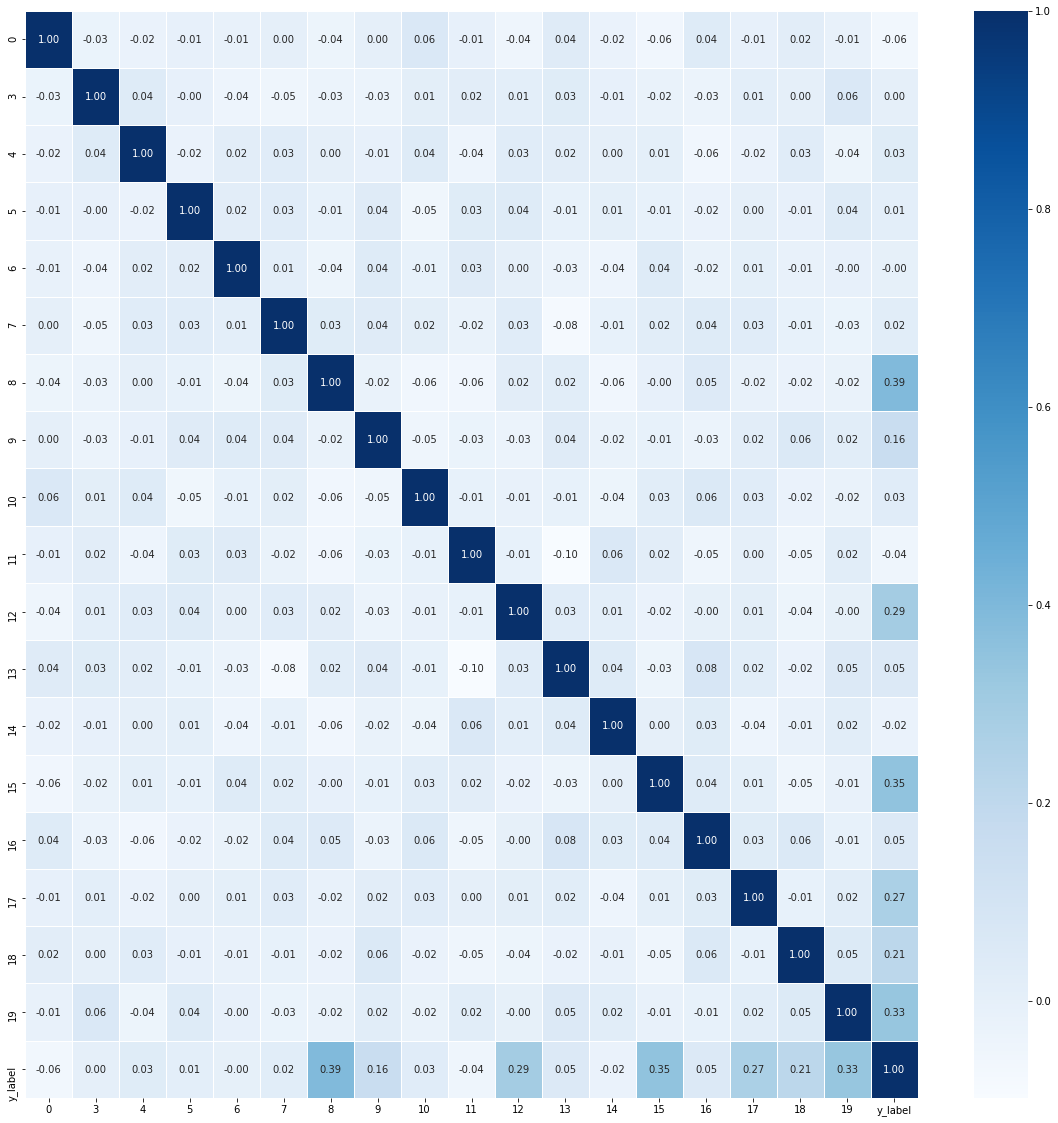

In [ ]:
pca_case.correlation_plot()

In [ ]:
pca_case.show_components()

,comp_00,comp_01,comp_02,comp_03,comp_04,comp_05,comp_06,comp_07,comp_08,comp_09,comp_10,comp_11,comp_12,comp_13,comp_14,comp_15,comp_16,comp_17,comp_18
0,0.015878,0.006371,-0.012731,0.043332,-0.050201,0.014592,-0.023269,0.017594,-0.021791,-0.037806,-0.029072,-0.030073,-0.003606,0.025762,-0.095450,-0.048492,0.010263,0.007730,0.015268
1,-0.022489,0.016186,0.024191,-0.014294,0.030352,0.042890,0.001169,0.031462,0.021981,0.024169,-0.063375,0.015201,0.004391,0.037039,-0.020520,0.025349,0.004860,0.044390,0.015165
2,-0.011545,0.006040,0.009995,0.026128,-0.029337,0.013409,-0.089137,-0.018189,-0.013673,-0.040906,0.047802,-0.000951,-0.055907,-0.002398,0.055563,-0.074901,-0.009206,0.030854,-0.028428
3,0.000039,0.004309,0.003498,-0.000977,0.014516,-0.026707,-0.031088,-0.031629,0.010202,-0.035418,-0.037413,-0.035939,0.002851,-0.026658,-0.003593,0.025155,0.030692,-0.013233,-0.009639
4,0.008248,0.042547,0.040444,-0.002419,-0.003428,-0.025027,0.031892,0.022821,-0.010438,-0.006513,-0.016392,-0.071332,-0.000900,-0.034149,0.011638,0.047385,-0.023547,0.000621,0.033721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.009126,0.009425,0.005967,-0.013584,0.013347,-0.032054,0.003680,0.033738,0.045997,-0.053944,0.040720,-0.032046,0.057565,-0.019359,-0.018573,-0.009749,-0.017774,-0.020075,0.013257
996,0.021566,-0.031796,-0.035607,-0.021595,0.066901,0.003233,0.009031,-0.030496,0.004707,0.066497,-0.052806,-0.023372,0.023244,0.051145,-0.043994,0.052626,-0.004352,0.047562,0.016581
997,0.014862,0.039722,-0.004794,-0.004393,0.019637,0.017770,0.009113,-0.030928,0.080385,-0.014171,-0.036176,-0.040718,-0.006260,0.033073,0.024495,-0.026593,0.014586,-0.047855,-0.031090
998,0.006382,-0.012523,0.000607,-0.002894,0.018771,-0.061599,-0.010726,-0.015721,0.032120,0.013520,0.008407,-0.013497,0.021181,-0.034899,-0.011616,-0.008332,0.015893,-0.006743,0.023633


In [ ]:
pca_case.show_components()

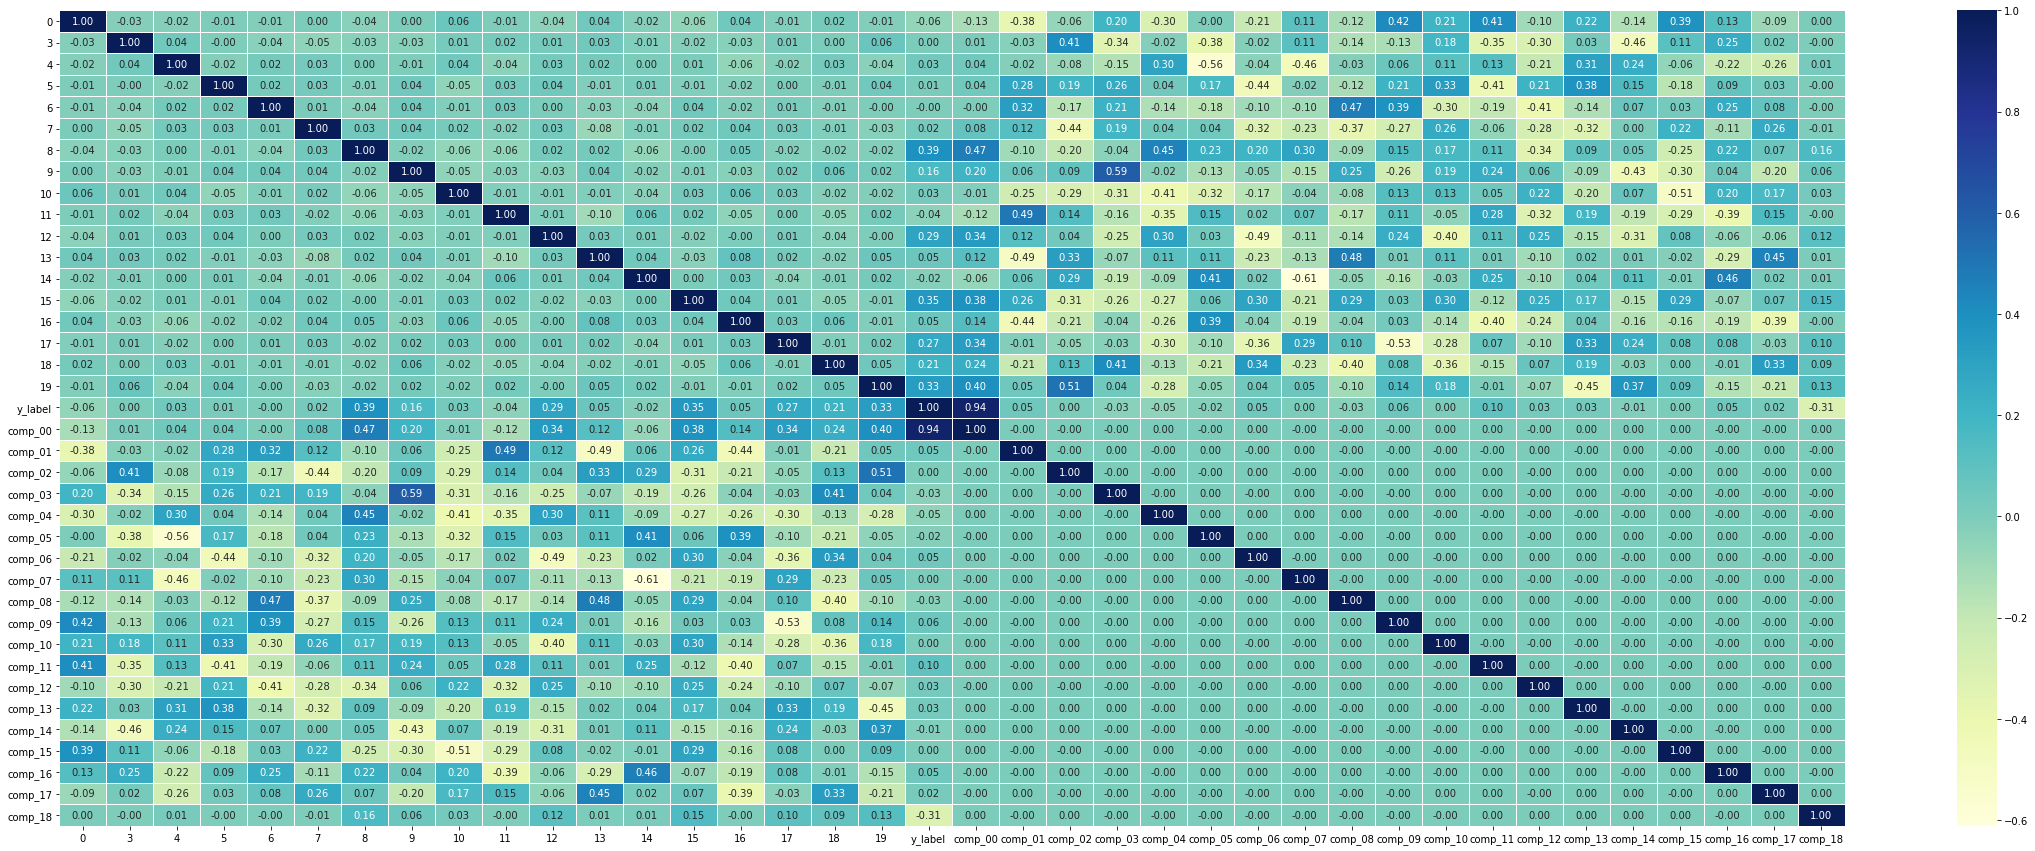

,comp_00,comp_01,comp_02,comp_03,comp_04,comp_05,comp_06,comp_07,comp_08,comp_09,comp_10,comp_11,comp_12,comp_13,comp_14,comp_15,comp_16,comp_17,comp_18
0,-0.126102,-0.375213,-0.064782,0.195689,-0.300217,-0.003124,-0.214564,0.110451,-0.124267,0.422550,0.205345,0.405729,-0.095755,0.217222,-0.141940,0.388160,0.129719,-0.087612,0.000252
3,0.007718,-0.028905,0.405313,-0.336605,-0.020559,-0.378343,-0.021137,0.106459,-0.138079,-0.129604,0.183771,-0.347248,-0.301027,0.025948,-0.459077,0.112037,0.247026,0.018365,-0.002730
4,0.039558,-0.023343,-0.079786,-0.148458,0.295198,-0.563839,-0.044686,-0.462281,-0.025011,0.061024,0.109852,0.126467,-0.206544,0.308486,0.240160,-0.058194,-0.222549,-0.260305,0.011941
5,0.037571,0.281912,0.194993,0.262210,0.036852,0.171642,-0.436186,-0.018850,-0.119037,0.209484,0.331900,-0.412022,0.211129,0.381699,0.153891,-0.175378,0.086547,0.026663,-0.004526
6,-0.000985,0.322923,-0.166348,0.214958,-0.138825,-0.176815,-0.101253,-0.102723,0.468448,0.386329,-0.301101,-0.192371,-0.405050,-0.136131,0.066504,0.028206,0.245496,0.077798,-0.001719
7,0.075755,0.120333,-0.441520,0.191610,0.037376,0.042126,-0.319148,-0.227299,-0.368026,-0.271230,0.258543,-0.063710,-0.281761,-0.322949,0.004631,0.216467,-0.110944,0.261919,-0.006950
8,0.466937,-0.100523,-0.195876,-0.041211,0.451091,0.229958,0.203139,0.299791,-0.089209,0.150924,0.172772,0.112158,-0.344832,0.089865,0.047074,-0.248891,0.222586,0.067399,0.160917
9,0.203582,0.055776,0.088386,0.594467,-0.021347,-0.131682,-0.046660,-0.146449,0.253935,-0.255534,0.185995,0.239567,0.058638,-0.094601,-0.429482,-0.300424,0.036635,-0.197191,0.061065
10,-0.007861,-0.251266,-0.293858,-0.305087,-0.408508,-0.317547,-0.167895,-0.038730,-0.084328,0.126138,0.129727,0.049120,0.216709,-0.197787,0.069696,-0.507065,0.202475,0.167349,0.025488
11,-0.117439,0.490670,0.135625,-0.160919,-0.350928,0.145570,0.017733,0.073798,-0.172080,0.108872,-0.046040,0.280025,-0.316285,0.188971,-0.193755,-0.288399,-0.386532,0.152274,-0.002618


In [ ]:
pca_case.show_correlation_plot()

## tuiautopilotml.pre_modelling.encoders 

### get_encoded_wrapper()
This function will return an encoded version of our dataset. Observe that this version of the library only applies Label Encoding 

In [ ]:
from tuiautopilotml.pre_modelling.encoders import get_encoded_wrapper

In [ ]:
# Identifies columns with categorical data in the dataframe and returns a copy of the dataframe with the
# categorical column values converted them to integer values in the range 0 to N-1 where N is the number of
# values found for a given categorical column.
# For example, if a category has values 'a', 'b' and 'c', these values may be replaced with the
# integers 0, 1 and 2 respectively.
    
encoded_df1 = get_encoded_wrapper(df=formatted_df, 
                                     encode_nulls=False, 
                                     return_mapping=False, 
                                     exclude_from_encoding=None)

Convert categorical features to integer valued features.


In [ ]:
encoded_df1.head()

,0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,y_label
0,-0.069569,1.029079,-1.924100,0.738182,0.050648,0.431314,-0.140589,2.250977,0.508393,1.232522,0.426923,-0.686352,-0.514991,-0.043792,1.592111,1.286825,1.206873,-1.385308,57.998102
1,0.164913,-0.288131,-1.410823,-0.114962,0.495851,-1.394840,0.405080,-1.274319,-1.713915,0.795550,1.179420,0.711785,0.273729,-0.307068,-0.937948,0.129555,0.138745,-1.402331,-144.044388
2,-0.368782,-0.387573,0.493682,2.195156,0.215677,2.190078,-0.038940,0.740299,1.507576,1.270354,-1.320544,1.223768,0.899885,-2.001396,0.326204,1.381349,-0.961049,0.596878,-61.471866
3,-0.993124,0.841631,0.280442,-0.206904,0.880179,0.643314,-1.128011,0.160928,-0.267734,-1.570623,0.931848,-0.249459,0.493837,-0.394850,0.049495,0.698457,-0.015682,-0.190653,-18.784091
4,-1.580732,1.368374,-0.604567,0.091259,0.571180,0.054684,-0.761465,-1.015132,-1.471651,-0.215548,-0.054830,-0.708785,-1.113764,0.645437,-0.536059,-0.074344,0.710070,1.871829,-45.128668


In [ ]:
# We can also choose to encode the columns that contain nulls 

#encoded_df2, mapping = get_encoded_wrapper(df=clf_sample_with_missing, 
 #                                    encode_nulls=True, 
  #                                   return_mapping=True, 
   #                                  exclude_from_encoding=None)

Encoding nulls...
Convert categorical features to integer valued features.


In [ ]:
# Here we can observe that AverageFlightDuration_ImputedValue, AveragePricePaid .. were encoded and new names 
# were assigned to these columns  

#encoded_df2.columns

Index(['Mosaic', 'Avg_LeadTime', 'Busyness', 'PriceSensitivity',
       'PriceDifference', 'TRatingNew',
       'CorrectedHolidayDuration_ImputedValue', 'Frequency', 'ActivePeriod',
       'Household_income___Median_income', 'Affluence',
       'Urbanity___Generalised_urbanity_measure',
       'Rurality___Remoteness_from_high_streets', 'Sum_IsWeb', 'BoardScore',
       'CountryName.Spain', 'BoardBasisOffersDescription.All.Inclusive',
       'HaulType.Mid', 'DestinationLoyalty', 'Sum_IsRetail', 'BrandLoyalty',
       'HaulType.Short', 'HaulLoyalty', 'Avg_IsSummer',
       'BoardBasisOffersDescription.Half.Board', 'Months', 'Segment',
       'encoded_nulls_AverageFlightDuration_ImputedValue',
       'encoded_nulls_AveragePricePaid',
       'encoded_nulls_BasicHolidayCostperPAX_ImputedValue',
       'encoded_nulls_AverageSpendPerActiveYear',
       'encoded_nulls_TotalRevenue'],
      dtype='object')

In [ ]:
#mapping

{'Mosaic': {0: 'AspiringHomemakers',
  1: 'CityProsperity',
  2: 'CountryLiving',
  3: 'DomesticSuccess',
  4: 'FamilyBasics',
  5: 'ModestTraditions',
  6: 'MunicipalChallenge',
  7: 'PrestigePositions',
  8: 'RentalHubs',
  9: 'RuralReality',
  10: 'SeniorSecurity',
  11: 'SuburbanStability',
  12: 'TransientRenters',
  13: 'UrbanCohesion',
  14: 'VintageValue'},
 'Segment': {0: 'CannyTanners',
  1: 'CautiousIndependents',
  2: 'EnergisedAdventurers',
  3: 'HomeAway',
  4: 'ReluctantHandHolders',
  5: 'Routinees',
  6: 'SeniorService',
  7: 'Travelistas'}}

In [ ]:
# Here we simply create and encoded version of the dataframe that we will use as input for other functions


encoded_df3 = get_encoded_wrapper(df=formatted_df, 
                                     encode_nulls=False, 
                                     return_mapping=False, 
                                     exclude_from_encoding=None)

Convert categorical features to integer valued features.


## tuiautopilotml.pre_modelling.handle_nulls
This category contains base methods to handle missing values such as imputation methods

### eval_imputation_method_wrapper()

In [ ]:
from tuiautopilotml.pre_modelling.handle_nulls import eval_imputation_method_wrapper

In [ ]:
# We pass some intial parameters as inputs. The function will test different inputation methods and will return
# a pandas dataframe with the method that got highest score  

output_df = eval_imputation_method_wrapper(df=clf_sample_with_missing, 
                               target_label='Segment', 
                               test_size=0.2, 
                               model=RandomForestClassifier(),
                               classification=True, 
                               evaluation_metric='accuracy')

Training fold: 0
Columns with missing values: ['AverageFlightDuration_ImputedValue', 'AveragePricePaid', 'BasicHolidayCostperPAX_ImputedValue', 'AverageSpendPerActiveYear', 'TotalRevenue']
Running strategy median
Convert categorical features to integer valued features.
Columns with missing values: ['AveragePricePaid', 'AverageSpendPerActiveYear', 'TotalRevenue']
Running strategy median
Convert categorical features to integer valued features.
Custom cv scores:[0.115]
Training fold: 1
Columns with missing values: ['AverageFlightDuration_ImputedValue', 'AveragePricePaid', 'BasicHolidayCostperPAX_ImputedValue', 'AverageSpendPerActiveYear', 'TotalRevenue']
Running strategy median
Convert categorical features to integer valued features.
Columns with missing values: ['AverageFlightDuration_ImputedValue', 'AveragePricePaid', 'BasicHolidayCostperPAX_ImputedValue', 'AverageSpendPerActiveYear', 'TotalRevenue']
Running strategy median
Convert categorical features to integer valued features.
Custom

Custom cv scores:[0.135, 0.175, 0.12, 0.625]
drop_nulls_score...
Training fold: 0
Convert categorical features to integer valued features.
Convert categorical features to integer valued features.
Custom cv scores:[0.1404494382022472]
Training fold: 1
Convert categorical features to integer valued features.
Convert categorical features to integer valued features.
Custom cv scores:[0.1404494382022472, 0.1564245810055866]
Training fold: 2
Convert categorical features to integer valued features.
Convert categorical features to integer valued features.
Custom cv scores:[0.1404494382022472, 0.1564245810055866, 0.12359550561797752]
Training fold: 3
Convert categorical features to integer valued features.
Convert categorical features to integer valued features.
Custom cv scores:[0.1404494382022472, 0.1564245810055866, 0.12359550561797752, 0.6067415730337079]
Encoding nulls...
Convert categorical features to integer valued features.
Training fold: 0
Custom cv scores:[0.615]
Training fold: 1
Cus

In [ ]:
output_df.head()

,Mosaic,Avg_LeadTime,Busyness,PriceSensitivity,PriceDifference,TRatingNew,CorrectedHolidayDuration_ImputedValue,Frequency,ActivePeriod,Household_income___Median_income,...,HaulLoyalty,Avg_IsSummer,BoardBasisOffersDescription.Half.Board,Months,Segment,encoded_nulls_AverageFlightDuration_ImputedValue,encoded_nulls_AveragePricePaid,encoded_nulls_BasicHolidayCostperPAX_ImputedValue,encoded_nulls_AverageSpendPerActiveYear,encoded_nulls_TotalRevenue
0,10,188,0.594327,324.3186,-455.9960,4.0,10,0.827664,517,13550,...,0.0,0.5,0.5,2,6,1,0,1,1,1
1,11,16,0.980703,-123.9615,-123.9615,1.0,11,1.000000,0,38987,...,0.5,1.0,0.0,1,0,1,1,1,1,1
2,6,29,0.366691,529.5864,529.5864,4.0,10,1.000000,0,29816,...,0.5,1.0,0.0,1,4,1,1,1,1,1
3,9,125,0.887191,279.6146,279.6146,5.0,7,1.000000,0,37455,...,0.5,1.0,0.0,1,3,1,1,1,1,1
4,11,8,0.862722,291.0431,291.0431,4.0,7,1.000000,0,44576,...,0.5,1.0,0.0,1,6,1,1,1,1,1


## tuiautopilotml.pre_modelling.imbalance (supports only classfication problems)
This section contains some functions to handle imbalance datasets

### evaluate_oversamplers()
This function supports SMOTE oversampling and Random Oversampling 

In [ ]:
from tuiautopilotml.pre_modelling.imbalance import evaluate_oversamplers

In [ ]:
# Observe that smote requires a large dataset in order to run without errors 

scores, oversample_df = evaluate_oversamplers(df=encoded_df3, 
                                         target_label='y_label', 
                                         classification=True, 
                                         evaluation_metric='accuracy',
                                         test_size=0.2, 
                                         class_threshold=5, 
                                         model=RandomForestClassifier(), 
                                         random_state=0)

----------- Checking imbalance degree -----------
It looks like your input data contains too many categories
The entropy is higher than 0.90. There are no imbalance issues so we skip this step


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
encoded_df3.segment.value_counts()

6    1801
0     965
3     932
2     496
4     386
7     296
5      88
1      36
Name: segment, dtype: int64

In [ ]:
oversample_df.segment.value_counts()

6    1801
0     965
3     932
2     496
4     402
7     296
5      88
1      36
Name: segment, dtype: int64

### TrainVsTest()
This object contains a set useful function to compare distribtutions between your train and test set in order to indetify the quality of the samples and avoid overfitting or underfitting

In [ ]:
from tuiautopilotml.pre_modelling.imbalance import TrainVsTest
from tuiautopilotml.base_helpers import train_test_split_from_df

In [ ]:
train, test = train_test_split_from_df(encoded_df3, 0.2)

# Here we define the object 

case = TrainVsTest(train, test)

In [ ]:
# The get report function will open a new window with an automated comparison of your train and test sets

case.get_report(target_label= 'segment')

Generating train test comparison report...


                                             |   | [  0%]   00:00 -> (? left)

Report Train_Test_Comparison.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Generating target analysis report...


                                             |   | [  0%]   00:00 -> (? left)

sweetviz does not support categorical values so we skip...


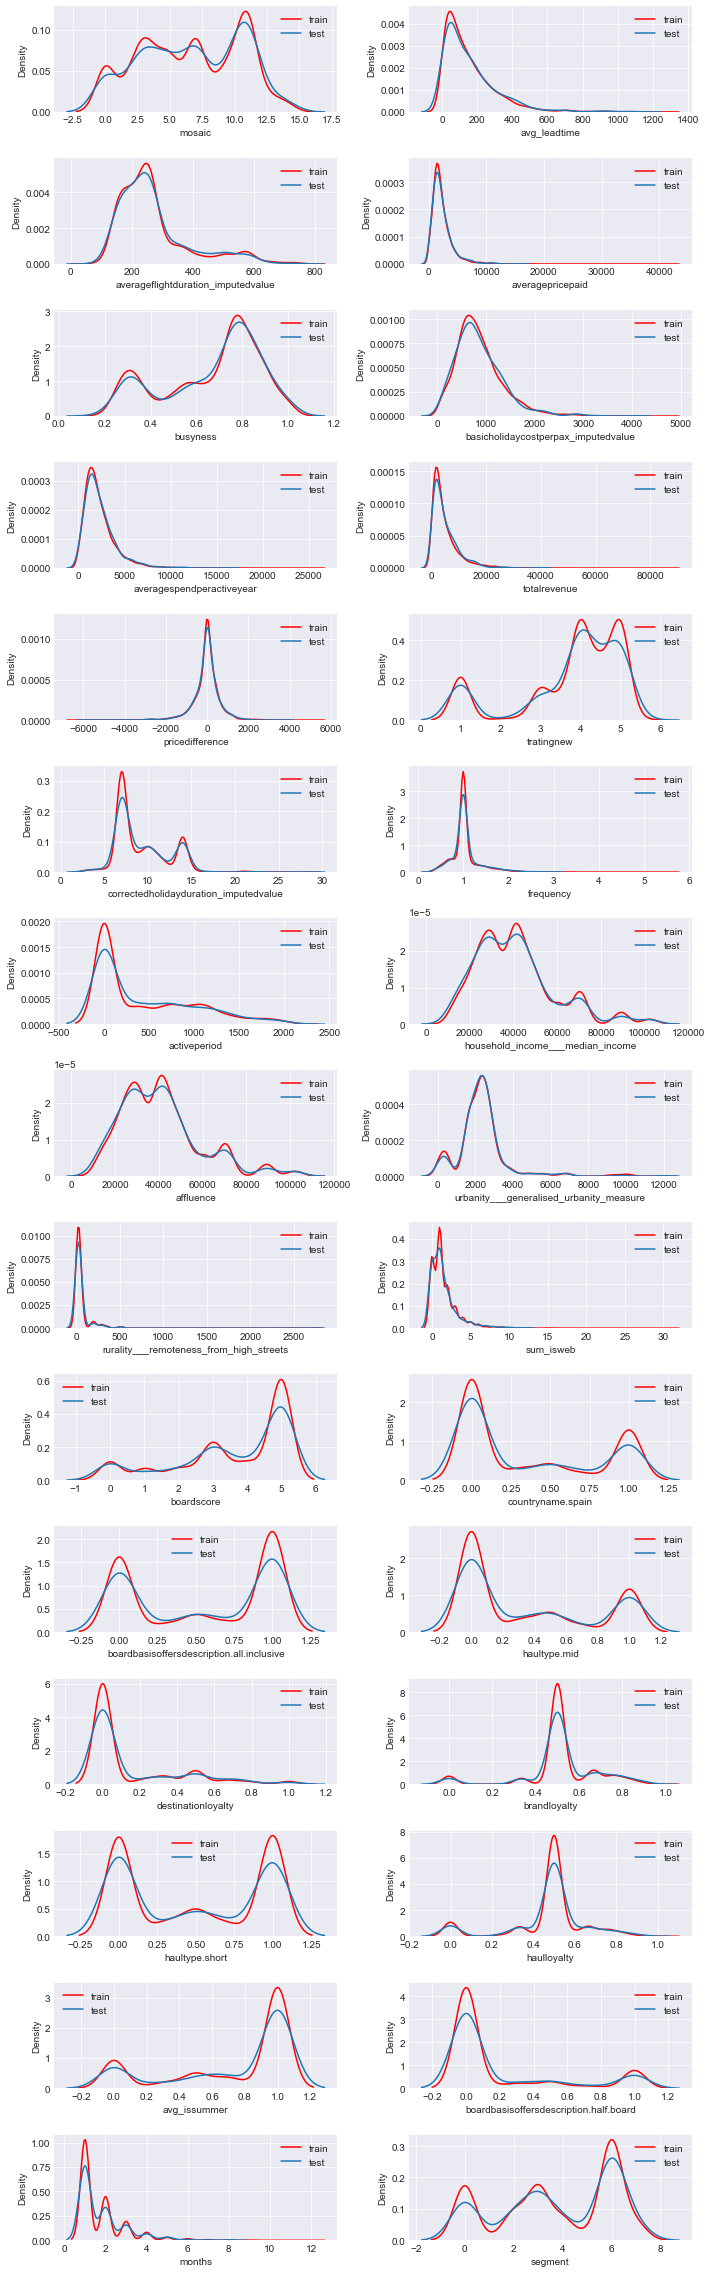

In [ ]:
# This function will visuallly a compraison of the distributions 

case.get_train_test_distribution()

In [ ]:
case.get_train_test_counts()

In [ ]:
# is_distribution_different returns a list with the columns that were different basen on a ttest and an alpha value of 0.05

df, diff_cols = case.is_distribution_different(alpha=0.05)

All the the distributions from test set are similar to train set


In [ ]:
# Covariate shift refers to the change in the distribution of the input variables present in the training 
# and the test data

# In this example we can see the train and test set are balanced since we acheived a score of 0.4987752000177952

mean_score, std  = case.get_covariance_shift_score(target_label = 'segment')


Current selected folds: [0, 1000, 2000, 3000, 4000]
new_train shape: (1000, 30)
Convert categorical features to integer valued features.
The process took: 0.08 minutes to run
Score for fold 0: [0.4941300675331834, 0.012188361916362512]
new_train shape: (1000, 30)
Convert categorical features to integer valued features.
The process took: 0.02 minutes to run
Score for fold 1: [0.46838218110011703, 0.018114967160057074]
new_train shape: (1000, 30)
Convert categorical features to integer valued features.
The process took: 0.02 minutes to run
Score for fold 2: [0.5167644988419087, 0.028682511509370828]
new_train shape: (1000, 30)
Convert categorical features to integer valued features.
The process took: 0.02 minutes to run
Score for fold 3: [0.5158162522999834, 0.016851314443532297]
Mean score: 0.4987732499437981, Standard deviation: 0.019744145806962037


In [ ]:
# get_covariance_shift_score_per_feature 

cov_scores, drop_list = case.get_covariance_shift_score_per_feature(cov_score_thresh=0.8)

Current selected folds: [0, 1000, 2000, 3000, 4000]
new_train shape: (1000, 30)
Convert categorical features to integer valued features.
Dataset(inputs=0       10
1       11
2        6
3        9
4       11
        ..
1995     5
1996     7
1997     4
1998     4
1999    10
Name: mosaic, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.08 minutes to run
Score for mosaic in fold 0: [nan, nan]
Dataset(inputs=0       188
1        16
2        29
3       125
4         8
       ... 
1995    403
1996      4
1997    173
1998    633
1999    272
Name: avg_leadtime, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for avg_leadtime in fold 0: [nan, nan]
Dataset(i

/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*ar

The process took: 0.0 minutes to run
Score for busyness in fold 0: [nan, nan]
Dataset(inputs=0       1709.9883
1        231.0000
2       1013.0000
3        824.5400
4        500.0000
          ...    
1995     709.8871
1996      62.0000
1997     703.6195
1998     971.9600
1999    2153.0000
Name: basicholidaycostperpax_imputedvalue, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for basicholidaycostperpax_imputedvalue in fold 0: [nan, nan]
Dataset(inputs=0       1809.758560
1        231.000000
2       2026.000000
3       1649.080000
4       1000.000000
           ...     
1995    1760.933641
1996      62.000000
1997    2604.872651
1998    1717.992252
1999    5327.762712
Name: averagespendperactiveyear, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995 

/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*ar

The process took: 0.0 minutes to run
Score for averagespendperactiveyear in fold 0: [nan, nan]
Dataset(inputs=0        4373.17
1         231.00
2        2026.00
3        1649.08
4        1000.00
          ...   
1995     9938.42
1996       62.00
1997    16257.26
1998     3887.84
1999     8612.00
Name: totalrevenue, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


elacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[2487.384   107.0385 1928.6946 ... 1327.933  1641.2611 4115.1924].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/

The process took: 0.0 minutes to run
Score for totalrevenue in fold 0: [nan, nan]
Dataset(inputs=0       -455.9960
1       -123.9615
2        529.5864
3        279.6146
4        291.0431
          ...    
1995    -280.5238
1996      91.4928
1997   -1140.8270
1998    -716.4989
1999   -1077.8074
Name: pricedifference, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


ckages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[0.9807028  0.36669073 0.8627219  ... 0.8568362  0.8684455  0.34755751].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line

The process took: 0.0 minutes to run
Score for pricedifference in fold 0: [nan, nan]
Dataset(inputs=0       4.0
1       1.0
2       4.0
3       5.0
4       4.0
       ... 
1995    4.0
1996    1.0
1997    4.0
1998    4.5
1999    1.0
Name: tratingnew, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run

/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*ar


Score for tratingnew in fold 0: [nan, nan]
Dataset(inputs=0       10
1       11
2       10
3        7
4        7
        ..
1995    11
1996     7
1997    13
1998    14
1999    17
Name: correctedholidayduration_imputedvalue, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for correctedholidayduration_imputedvalue in fold 0: [nan, nan]
Dataset(inputs=0       0.827664
1       1.000000
2       1.000000
3       1.000000
4       1.000000
          ...   
1995    1.240291
1996    1.000000
1997    0.961370
1998    0.883777
1999    1.237288
Name: frequency, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


timator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[ -123.9615   529.5864   291.0431 ... -1140.827   -716.4989 -1077.8074].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/min

The process took: 0.0 minutes to run
Score for frequency in fold 0: [nan, nan]
Dataset(inputs=0        517
1          0
2          0
3          0
4          0
        ... 
1995    1695
1996       0
1997    1913
1998     461
1999     225
Name: activeperiod, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for activeperiod in fold 0: [nan, nan]
Dataset(inputs=0       13550
1       38987
2       29816
3       37455
4       44576
        ...  
1995    29686
1996    49069
1997    28820
1998    28820
1999    22964
Name: household_income___median_income, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


d_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sk

The process took: 0.0 minutes to run
Score for household_income___median_income in fold 0: [nan, nan]
Dataset(inputs=0       13550
1       38987
2       29816
3       37455
4       44576
        ...  
1995    29686
1996    49069
1997    28820
1998    28820
1999    22964
Name: affluence, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for affluence in fold 0: [nan, nan]
Dataset(inputs=0       2440.819180
1       2157.972264
2       9681.428228
3        451.908942
4       2263.820492
           ...     
1995    2589.682326
1996    1772.354560
1997    2611.409877
1998    2611.409877
1999    2254.472024
Name: urbanity___generalised_urbanity_measure, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train,

/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*ar

The process took: 0.0 minutes to run
Score for urbanity___generalised_urbanity_measure in fold 0: [nan, nan]
Dataset(inputs=0        19.615320
1        26.533606
2         4.255287
3       183.754987
4        28.036504
           ...    
1995     22.661123
1996     30.564792
1997     23.156649
1998     23.156649
1999     17.976870
Name: rurality___remoteness_from_high_streets, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for rurality___remoteness_from_high_streets in fold 0: [nan, nan]
Dataset(inputs=0       2
1       1
2       0
3       1
4       0
       ..
1995    4
1996    1
1997    6
1998    2
1999    0
Name: sum_isweb, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dty

t_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[1.         1.         1.         ... 0.96136963 0.88377726 1.2372881 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/pyt

The process took: 0.0 minutes to run
Score for sum_isweb in fold 0: [nan, nan]
Dataset(inputs=0       4.000000
1       0.000000
2       5.000000
3       5.000000
4       5.000000
          ...   
1995    2.142857
1996    0.000000
1997    5.000000
1998    3.000000
1999    5.000000
Name: boardscore, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


lidation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[2157.9722 9681.429  2263.8206 ... 2611.41   2611.41   2254.472 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)


The process took: 0.0 minutes to run
Score for boardscore in fold 0: [nan, nan]
Dataset(inputs=0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1995    0.428571
1996    0.000000
1997    0.000000
1998    0.000000
1999    0.000000
Name: countryname.spain, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for countryname.spain in fold 0: [nan, nan]
Dataset(inputs=0       0.5
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
1995    0.0
1996    0.0
1997    1.0
1998    0.5
1999    1.0
Name: boardbasisoffersdescription.all.inclusive, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*ar

The process took: 0.0 minutes to run
Score for boardbasisoffersdescription.all.inclusive in fold 0: [nan, nan]
Dataset(inputs=0       0.500000
1       0.000000
2       0.000000
3       1.000000
4       0.000000
          ...   
1995    0.571428
1996    1.000000
1997    1.000000
1998    1.000000
1999    0.000000
Name: haultype.mid, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for haultype.mid in fold 0: [nan, nan]
Dataset(inputs=0       0.500000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1995    0.714286
1996    0.000000
1997    0.666667
1998    0.500000
1999    1.000000
Name: destinationloyalty, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Len

ese parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz

The process took: 0.0 minutes to run
Score for destinationloyalty in fold 0: [nan, nan]
Dataset(inputs=0       0.500000
1       0.500000
2       0.500000
3       0.500000
4       0.500000
          ...   
1995    0.857143
1996    0.500000
1997    0.666667
1998    0.500000
1999    0.500000
Name: brandloyalty, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run

/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*ar


Score for brandloyalty in fold 0: [nan, nan]
Dataset(inputs=0       0.000000
1       1.000000
2       0.000000
3       0.000000
4       1.000000
          ...   
1995    0.428571
1996    0.000000
1997    0.000000
1998    0.000000
1999    0.000000
Name: haultype.short, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for haultype.short in fold 0: [nan, nan]
Dataset(inputs=0       0.000000
1       0.500000
2       0.500000
3       0.500000
4       0.500000
          ...   
1995    0.714286
1996    0.500000
1997    0.833333
1998    0.500000
1999    0.500000
Name: haulloyalty, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score 

n.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[ 19.61532   26.533606 183.75499  ...  23.156649  23.156649  17.97687 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last

    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[2. 0. 1. ... 1. 6. 2.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test 

The process took: 0.0 minutes to run
Score for avg_issummer in fold 0: [nan, nan]
Dataset(inputs=0       0.500000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1995    0.428571
1996    0.000000
1997    0.000000
1998    0.000000
1999    0.000000
Name: boardbasisoffersdescription.half.board, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run

lacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[0.5      0.       0.       ... 0.333333 0.571428 0.      ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages


Score for boardbasisoffersdescription.half.board in fold 0: [nan, nan]
Dataset(inputs=0       2
1       1
2       1
3       1
4       1
       ..
1995    3
1996    1
1997    3
1998    2
1999    1
Name: months, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for months in fold 0: [nan, nan]
Dataset(inputs=0       6
1       0
2       4
3       3
4       6
       ..
1995    6
1996    2
1997    6
1998    6
1999    6
Name: segment, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


 single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/l

The process took: 0.0 minutes to run
Score for segment in fold 0: [nan, nan]
new_train shape: (1000, 30)
Convert categorical features to integer valued features.
Dataset(inputs=0        7
1        3
2        7
3       11
4        4
        ..
1995     5
1996     7
1997     4
1998     4
1999    10
Name: mosaic, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


lection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs

The process took: 0.0 minutes to run
Score for mosaic in fold 1: [nan, nan]
Dataset(inputs=0        23
1        11
2        56
3        27
4         3
       ... 
1995    403
1996      4
1997    173
1998    633
1999    272
Name: avg_leadtime, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for avg_leadtime in fold 1: [nan, nan]
Dataset(inputs=0       220.000000
1       205.000000
2       306.250000
3       260.000000
4       160.000000
           ...    
1995    235.357142
1996    405.000000
1997    240.833333
1998    260.000000
1999    177.500000
Name: averageflightduration_imputedvalue, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


D array, got 1D array instead:
array=[0.5 0.  0.  ... 0.  0.  0. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base

The process took: 0.0 minutes to run
Score for averageflightduration_imputedvalue in fold 1: [nan, nan]
Dataset(inputs=0         96.9148
1        396.4875
2       4117.0000
3       1105.6205
4        112.8199
          ...    
1995    1519.9962
1996     153.4928
1997    1327.9330
1998    1641.2611
1999    4115.1926
Name: averagepricepaid, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/

The process took: 0.0 minutes to run
Score for averagepricepaid in fold 1: [nan, nan]
Dataset(inputs=0       0.773047
1       0.772151
2       0.597251
3       0.256079
4       0.773047
          ...   
1995    0.633662
1996    0.906641
1997    0.856836
1998    0.868446
1999    0.347558
Name: busyness, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for busyness in fold 1: [nan, nan]


3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[0.5       0.5       0.5       ... 0.6666667 0.5       0.5      ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py",

Dataset(inputs=0         40.0000
1        169.0000
2        762.9999
3        415.6800
4        119.0000
          ...    
1995     709.8871
1996      62.0000
1997     703.6195
1998     971.9600
1999    2153.0000
Name: basicholidaycostperpax_imputedvalue, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for basicholidaycostperpax_imputedvalue in fold 1: [nan, nan]
Dataset(inputs=0         40.000000
1        338.000000
2       2227.960000
3        831.360000
4        119.000000
           ...     
1995    1760.933641
1996      62.000000
1997    2604.872651
1998    1717.992252
1999    5327.762712
Name: averagespendperactiveyear, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dty

vs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(arr

The process took: 0.0 minutes to run
Score for averagespendperactiveyear in fold 1: [nan, nan]
Dataset(inputs=0          40.00
1         338.00
2        4578.00
3         831.36
4         119.00
          ...   
1995     9938.42
1996       62.00
1997    16257.26
1998     3887.84
1999     8612.00
Name: totalrevenue, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


ese parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz

The process took: 0.0 minutes to run
Score for totalrevenue in fold 1: [nan, nan]
Dataset(inputs=0         56.9148
1         58.4875
2          0.0000
3        274.2605
4         -6.1801
          ...    
1995    -280.5238
1996      91.4928
1997   -1140.8270
1998    -716.4989
1999   -1077.8074
Name: pricedifference, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for pricedifference in fold 1: [nan, nan]
Dataset(inputs=0       1.0
1       1.0
2       5.0
3       3.5
4       1.0
       ... 
1995    4.0
1996    1.0
1997    4.0
1998    4.5
1999    1.0
Name: tratingnew, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


iniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[ 396.4875 4117.      112.8199 ... 1327.933  1641.2611 4115.1924].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/auto

The process took: 0.0 minutes to run
Score for tratingnew in fold 1: [nan, nan]
Dataset(inputs=0        7
1        7
2        5
3        5
4        7
        ..
1995    11
1996     7
1997    13
1998    14
1999    17
Name: correctedholidayduration_imputedvalue, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for correctedholidayduration_imputedvalue in fold 1: [nan, nan]
Dataset(inputs=0       1.000000
1       1.000000
2       0.973333
3       1.000000
4       1.000000
          ...   
1995    1.240291
1996    1.000000
1997    0.961370
1998    0.883777
1999    1.237288
Name: frequency, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


  X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[  40.      338.     2227.96   ... 2604.8726 1717.9923 5327.7627].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single s

The process took: 0.0 minutes to run
Score for frequency in fold 1: [nan, nan]
Dataset(inputs=0          0
1          0
2        385
3          0
4          0
        ... 
1995    1695
1996       0
1997    1913
1998     461
1999     225
Name: activeperiod, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[  338.    4578.     119.   ... 16257.26  3887.84  8612.  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_par

The process took: 0.0 minutes to run
Score for activeperiod in fold 1: [nan, nan]
Dataset(inputs=0       89212
1       53789
2       49069
3       41556
4       23547
        ...  
1995    29686
1996    49069
1997    28820
1998    28820
1999    22964
Name: household_income___median_income, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


eturn f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[0.7730473  0.7721508  0.59725136 ... 0.8568362  0.8684455  0.34755751].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimato

The process took: 0.01 minutes to run
Score for household_income___median_income in fold 1: [nan, nan]
Dataset(inputs=0       89212
1       53789
2       49069
3       41556
4       23547
        ...  
1995    29686
1996    49069
1997    28820
1998    28820
1999    22964
Name: affluence, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run

z/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f


Score for affluence in fold 1: [nan, nan]
Dataset(inputs=0       1354.557635
1       1656.036249
2       1772.354560
3       2207.723554
4       3086.209337
           ...     
1995    2589.682326
1996    1772.354560
1997    2611.409877
1998    2611.409877
1999    2254.472024
Name: urbanity___generalised_urbanity_measure, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for urbanity___generalised_urbanity_measure in fold 1: [nan, nan]
Dataset(inputs=0       52.981323
1       44.762398
2       30.564792
3       25.647209
4       13.782139
          ...    
1995    22.661123
1996    30.564792
1997    23.156649
1998    23.156649
1999    17.976870
Name: rurality___remoteness_from_high_streets, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    

Warning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    ret

  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[1.         1.         1.         ... 0.96136963 0.88377726 1.2372881 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/User

The process took: 0.0 minutes to run
Score for boardscore in fold 1: [nan, nan]
Dataset(inputs=0       0.000000
1       0.000000
2       0.000000
3       1.000000
4       0.000000
          ...   
1995    0.428571
1996    0.000000
1997    0.000000
1998    0.000000
1999    0.000000
Name: countryname.spain, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for countryname.spain in fold 1: [nan, nan]
Dataset(inputs=0       0.0
1       0.0
2       0.5
3       1.0
4       0.0
       ... 
1995    0.0
1996    0.0
1997    1.0
1998    0.5
1999    1.0
Name: boardbasisoffersdescription.all.inclusive, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


s/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[1.         1.         0.97333336 ... 0.5060074  1.2402912  1.2372881 ].
Reshap

The process took: 0.0 minutes to run
Score for boardbasisoffersdescription.all.inclusive in fold 1: [nan, nan]
Dataset(inputs=0       0.000000
1       0.000000
2       0.500000
3       0.000000
4       0.000000
          ...   
1995    0.571428
1996    1.000000
1997    1.000000
1998    1.000000
1999    0.000000
Name: haultype.mid, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for haultype.mid in fold 1: [nan, nan]
Dataset(inputs=0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1995    0.714286
1996    0.000000
1997    0.666667
1998    0.500000
1999    1.000000
Name: destinationloyalty, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Len

z/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[89212. 49069. 41556. ... 49069. 28820. 28820.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters wil

The process took: 0.0 minutes to run
Score for destinationloyalty in fold 1: [nan, nan]
Dataset(inputs=0       0.500000
1       0.500000
2       0.500000
3       0.500000
4       0.500000
          ...   
1995    0.857143
1996    0.500000
1997    0.666667
1998    0.500000
1999    0.500000
Name: brandloyalty, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for brandloyalty in fold 1: [nan, nan]
Dataset(inputs=0       1.000000
1       1.000000
2       0.500000
3       1.000000
4       0.000000
          ...   
1995    0.428571
1996    0.000000
1997    0.000000
1998    0.000000
1999    0.000000
Name: haultype.short, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


 it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/v

  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. ... 6. 2. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib

The process took: 0.0 minutes to run
Score for haultype.short in fold 1: [nan, nan]
Dataset(inputs=0       0.500000
1       0.500000
2       0.000000
3       0.500000
4       0.500000
          ...   
1995    0.714286
1996    0.500000
1997    0.833333
1998    0.500000
1999    0.500000
Name: haulloyalty, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


k_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[0.  2.5 5.  ... 0.  5.  3. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/ca

The process took: 0.0 minutes to run
Score for haulloyalty in fold 1: [nan, nan]
Dataset(inputs=0       1.000000
1       1.000000
2       0.500000
3       0.000000
4       1.000000
          ...   
1995    0.571428
1996    1.000000
1997    1.000000
1998    1.000000
1999    0.000000
Name: avg_issummer, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for avg_issummer in fold 1: [nan, nan]
Dataset(inputs=0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1995    0.428571
1996    0.000000
1997    0.000000
1998    0.000000
1999    0.000000
Name: boardbasisoffersdescription.half.board, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000,

da3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[ 338.     2227.96    119.     ... 2604.8726 1717.9923 5327.7627].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_en

The process took: 0.0 minutes to run
Score for boardbasisoffersdescription.half.board in fold 1: [nan, nan]
Dataset(inputs=0       1
1       1
2       2
3       1
4       1
       ..
1995    3
1996    1
1997    3
1998    2
1999    1
Name: months, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for months in fold 1: [nan, nan]
Dataset(inputs=0       2
1       0
2       6
3       6
4       0
       ..
1995    6
1996    2
1997    6
1998    6
1999    6
Name: segment, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


conda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[1354.5576 1772.3546 2207.7236 ... 1772.3546 2611.41   2611.41  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/skle

The process took: 0.0 minutes to run
Score for segment in fold 1: [nan, nan]
new_train shape: (1000, 30)
Convert categorical features to integer valued features.
Dataset(inputs=0        9
1        0
2       13
3       11
4       11
        ..
1995     5
1996     7
1997     4
1998     4
1999    10
Name: mosaic, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run

check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. ... 6. 2. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/p


Score for mosaic in fold 2: [nan, nan]
Dataset(inputs=0       249
1       101
2        43
3       143
4       168
       ... 
1995    403
1996      4
1997    173
1998    633
1999    272
Name: avg_leadtime, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for avg_leadtime in fold 2: [nan, nan]
Dataset(inputs=0       283.333333
1       340.000000
2       317.500000
3       576.250000
4       230.000000
           ...    
1995    235.357142
1996    405.000000
1997    240.833333
1998    260.000000
1999    177.500000
Name: averageflightduration_imputedvalue, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)

arlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[0.        0.        0.        ... 0.6666667 0.5       1.       ].
Reshape your da


The process took: 0.0 minutes to run
Score for averageflightduration_imputedvalue in fold 2: [nan, nan]
Dataset(inputs=0       1421.4309
1       1854.5380
2        239.2411
3       4940.9100
4       1024.2750
          ...    
1995    1519.9962
1996     153.4928
1997    1327.9330
1998    1641.2611
1999    4115.1926
Name: averagepricepaid, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


ackages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[0.5       0.        0.5       ... 0.8333333 0.5       0.5      ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model

The process took: 0.0 minutes to run
Score for averagepricepaid in fold 2: [nan, nan]
Dataset(inputs=0       0.471499
1       0.719037
2       0.773047
3       0.655012
4       1.000000
          ...   
1995    0.633662
1996    0.906641
1997    0.856836
1998    0.868446
1999    0.347558
Name: busyness, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run

", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[52.981323 44.762398 25.64721  ... 23.156649 23.156649 17.97687 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit


Score for busyness in fold 2: [nan, nan]
Dataset(inputs=0        782.4822
1       1085.5000
2        401.5000
3       1582.1516
4        636.5475
          ...    
1995     709.8871
1996      62.0000
1997     703.6195
1998     971.9600
1999    2153.0000
Name: basicholidaycostperpax_imputedvalue, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    

The process took: 0.0 minutes to run
Score for basicholidaycostperpax_imputedvalue in fold 2: [nan, nan]
Dataset(inputs=0       2470.750820
1       2171.000000
2        522.450980
3       3406.993265
4        803.944074
           ...     
1995    1760.933641
1996      62.000000
1997    2604.872651
1998    1717.992252
1999    5327.762712
Name: averagespendperactiveyear, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for averagespendperactiveyear in fold 2: [nan, nan]
Dataset(inputs=0       10323.00
1        2171.00
2        1606.00
3        9492.91
4        2546.19
          ...   
1995     9938.42
1996       62.00
1997    16257.26
1998     3887.84
1999     8612.00
Name: totalrevenue, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
19

kages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[0.        0.        0.        ... 0.6666667 0.5       1.       ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, i

The process took: 0.0 minutes to run
Score for totalrevenue in fold 2: [nan, nan]
Dataset(inputs=0       -288.8091
1       -316.4620
2        -34.7589
3          0.0000
4       -266.3150
          ...    
1995    -280.5238
1996      91.4928
1997   -1140.8270
1998    -716.4989
1999   -1077.8074
Name: pricedifference, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


ne 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[2. 0. 6. ... 6. 6. 6.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score o

The process took: 0.0 minutes to run
Score for pricedifference in fold 2: [nan, nan]
Dataset(inputs=0       3.5
1       4.5
2       5.0
3       5.0
4       3.5
       ... 
1995    4.0
1996    1.0
1997    4.0
1998    4.5
1999    1.0
Name: tratingnew, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run

te-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D arra


Score for tratingnew in fold 2: [nan, nan]
Dataset(inputs=0       11
1        7
2        7
3       14
4       10
        ..
1995    11
1996     7
1997    13
1998    14
1999    17
Name: correctedholidayduration_imputedvalue, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for correctedholidayduration_imputedvalue in fold 2: [nan, nan]
Dataset(inputs=0       1.436066
1       1.000000
2       0.650624
3       0.717797
4       0.631488
          ...   
1995    1.240291
1996    1.000000
1997    0.961370
1998    0.883777
1999    1.237288
Name: frequency, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)

check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[249. 101.  43. ... 173. 633. 272.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carl


The process took: 0.0 minutes to run
Score for frequency in fold 2: [nan, nan]


idation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_e

Dataset(inputs=0       1160
1          0
2        757
3        652
4        791
        ... 
1995    1695
1996       0
1997    1913
1998     461
1999     225
Name: activeperiod, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for activeperiod in fold 2: [nan, nan]
Dataset(inputs=0       20060
1       47734
2       42565
3       41556
4       44576
        ...  
1995    29686
1996    49069
1997    28820
1998    28820
1999    22964
Name: household_income___median_income, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


a3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[2. 6. 6. ... 2. 6. 6.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ens

The process took: 0.0 minutes to run
Score for household_income___median_income in fold 2: [nan, nan]
Dataset(inputs=0       20060
1       47734
2       42565
3       41556
4       44576
        ...  
1995    29686
1996    49069
1997    28820
1998    28820
1999    22964
Name: affluence, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


ages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[1421.4309  239.2411 4940.91   ...  153.4928 1327.933  1641.2611].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_se

The process took: 0.0 minutes to run
Score for affluence in fold 2: [nan, nan]
Dataset(inputs=0        483.626255
1       3046.566307
2       5624.576616
3       2207.723554
4       2263.820492
           ...     
1995    2589.682326
1996    1772.354560
1997    2611.409877
1998    2611.409877
1999    2254.472024
Name: urbanity___generalised_urbanity_measure, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for urbanity___generalised_urbanity_measure in fold 2: [nan, nan]
Dataset(inputs=0       293.357960
1        13.185063
2         5.876783
3        25.647209
4        28.036504
           ...    
1995     22.661123
1996     30.564792
1997     23.156649
1998     23.156649
1999     17.976870
Name: rurality___remoteness_from_high_streets, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3

 **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[0.5        0.5        0.5        ... 0.6666667  0.85714287 0.5       ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

The process took: 0.0 minutes to run
Score for rurality___remoteness_from_high_streets in fold 2: [nan, nan]
Dataset(inputs=0       6
1       0
2       2
3       0
4       2
       ..
1995    4
1996    1
1997    6
1998    2
1999    0
Name: sum_isweb, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for sum_isweb in fold 2: [nan, nan]


1854.538   239.2411 ... 1327.933  1641.2611 4115.1924].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 4

Dataset(inputs=0       5.000000
1       5.000000
2       2.500000
3       5.000000
4       1.000000
          ...   
1995    2.142857
1996    0.000000
1997    5.000000
1998    3.000000
1999    5.000000
Name: boardscore, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[ -288.8091  -316.462    -34.7589 ... -1140.827   -716.4989 -1077.8074].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_

The process took: 0.0 minutes to run
Score for boardscore in fold 2: [nan, nan]
Dataset(inputs=0       1.000000
1       0.000000
2       0.000000
3       0.000000
4       1.000000
          ...   
1995    0.428571
1996    0.000000
1997    0.000000
1998    0.000000
1999    0.000000
Name: countryname.spain, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run

hon3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs


Score for countryname.spain in fold 2: [nan, nan]
Dataset(inputs=0       1.0
1       1.0
2       0.5
3       1.0
4       0.0
       ... 
1995    0.0
1996    0.0
1997    1.0
1998    0.5
1999    1.0
Name: boardbasisoffersdescription.all.inclusive, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for boardbasisoffersdescription.all.inclusive in fold 2: [nan, nan]
Dataset(inputs=0       0.000000
1       1.000000
2       0.500000
3       0.000000
4       0.000000
          ...   
1995    0.571428
1996    1.000000
1997    1.000000
1998    1.000000
1999    0.000000
Name: haultype.mid, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


)
ValueError: Expected 2D array, got 1D array instead:
array=[1160.  757.  652. ...    0. 1913.  461.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/

The process took: 0.0 minutes to run
Score for haultype.mid in fold 2: [nan, nan]
Dataset(inputs=0       0.833333
1       0.000000
2       0.500000
3       0.500000
4       0.500000
          ...   
1995    0.714286
1996    0.000000
1997    0.666667
1998    0.500000
1999    1.000000
Name: destinationloyalty, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


rn f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[20060. 42565. 41556. ... 49069. 28820. 28820.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/

The process took: 0.0 minutes to run
Score for destinationloyalty in fold 2: [nan, nan]
Dataset(inputs=0       0.833333
1       0.500000
2       0.000000
3       0.000000
4       0.500000
          ...   
1995    0.857143
1996    0.500000
1997    0.666667
1998    0.500000
1999    0.500000
Name: brandloyalty, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for brandloyalty in fold 2: [nan, nan]
Dataset(inputs=0       1.000000
1       0.000000
2       0.000000
3       0.000000
4       1.000000
          ...   
1995    0.428571
1996    0.000000
1997    0.000000
1998    0.000000
1999    0.000000
Name: haultype.short, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


v/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)

The process took: 0.0 minutes to run
Score for haultype.short in fold 2: [nan, nan]
Dataset(inputs=0       0.833333
1       0.500000
2       0.500000
3       0.500000
4       0.500000
          ...   
1995    0.714286
1996    0.500000
1997    0.833333
1998    0.500000
1999    0.500000
Name: haulloyalty, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


ot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
Value

The process took: 0.0 minutes to run
Score for haulloyalty in fold 2: [nan, nan]
Dataset(inputs=0       0.333333
1       1.000000
2       1.000000
3       0.500000
4       1.000000
          ...   
1995    0.571428
1996    1.000000
1997    1.000000
1998    1.000000
1999    0.000000
Name: avg_issummer, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run

validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[0.8333333 0.5       0.5       ... 0.        0.6666667 0.5      ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation


Score for avg_issummer in fold 2: [nan, nan]
Dataset(inputs=0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1995    0.428571
1996    0.000000
1997    0.000000
1998    0.000000
1999    0.000000
Name: boardbasisoffersdescription.half.board, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for boardbasisoffersdescription.half.board in fold 2: [nan, nan]
Dataset(inputs=0       3
1       1
2       2
3       2
4       1
       ..
1995    3
1996    1
1997    3
1998    2
1999    1
Name: months, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


nda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users

The process took: 0.0 minutes to run
Score for months in fold 2: [nan, nan]
Dataset(inputs=0       6
1       0
2       1
3       4
4       3
       ..
1995    6
1996    2
1997    6
1998    6
1999    6
Name: segment, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[0.8333333  0.         0.5        ... 0.6666667  0.71428573 1.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/pyt

The process took: 0.0 minutes to run
Score for segment in fold 2: [nan, nan]
new_train shape: (1000, 30)
Convert categorical features to integer valued features.
Dataset(inputs=0        4
1        8
2        5
3        3
4        5
        ..
1995     5
1996     7
1997     4
1998     4
1999    10
Name: mosaic, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


ata either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  Fil

The process took: 0.0 minutes to run
Score for mosaic in fold 3: [nan, nan]
Dataset(inputs=0        99
1       155
2       136
3        59
4        31
       ... 
1995    403
1996      4
1997    173
1998    633
1999    272
Name: avg_leadtime, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


le "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[5.  2.5 5.  ... 0.  5.  3. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramete

The process took: 0.0 minutes to run
Score for avg_leadtime in fold 3: [nan, nan]
Dataset(inputs=0       217.500000
1       155.000000
2       182.500000
3       267.222222
4       187.045454
           ...    
1995    235.357142
1996    405.000000
1997    240.833333
1998    260.000000
1999    177.500000
Name: averageflightduration_imputedvalue, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for averageflightduration_imputedvalue in fold 3: [nan, nan]
Dataset(inputs=0       1095.6765
1       3246.6420
2       1502.8636
3       1541.0298
4       1714.9621
          ...    
1995    1519.9962
1996     153.4928
1997    1327.9330
1998    1641.2611
1999    4115.1926
Name: averagepricepaid, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
199

 _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-pac

The process took: 0.0 minutes to run
Score for averagepricepaid in fold 3: [nan, nan]
Dataset(inputs=0       0.719037
1       0.772151
2       0.906641
3       0.478655
4       0.566025
          ...   
1995    0.633662
1996    0.906641
1997    0.856836
1998    0.868446
1999    0.347558
Name: busyness, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for busyness in fold 3: [nan, nan]
Dataset(inputs=0        342.1666
1        862.6666
2        474.5000
3        850.2700
4        596.1363
          ...    
1995     709.8871
1996      62.0000
1997     703.6195
1998     971.9600
1999    2153.0000
Name: basicholidaycostperpax_imputedvalue, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 

  accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[1.  1.  1.  ... 1.  0.5 1. ].

  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[0.8333333 0.5       0.5       ... 0.8333333 0.5       0.5      ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carl

The process took: 0.0 minutes to run
Score for basicholidaycostperpax_imputedvalue in fold 3: [nan, nan]
Dataset(inputs=0       1026.500000
1       2588.000000
2       1423.500000
3       2363.060025
4       3090.121344
           ...     
1995    1760.933641
1996      62.000000
1997    2604.872651
1998    1717.992252
1999    5327.762712
Name: averagespendperactiveyear, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for averagespendperactiveyear in fold 3: [nan, nan]
Dataset(inputs=0        1026.50
1        2588.00
2        1423.50
3       15304.86
4       13605.00
          ...   
1995     9938.42
1996       62.00
1997    16257.26
1998     3887.84
1999     8612.00
Name: totalrevenue, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
19

osdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[ 4.  8.  5. ... 11.  5. 10.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_

The process took: 0.0 minutes to run
Score for totalrevenue in fold 3: [nan, nan]
Dataset(inputs=0         69.1765
1        658.6420
2         79.3636
3        411.2098
4        124.9621
          ...    
1995    -280.5238
1996      91.4928
1997   -1140.8270
1998    -716.4989
1999   -1077.8074
Name: pricedifference, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for pricedifference in fold 3: [nan, nan]

/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details:


Dataset(inputs=0       3.5
1       4.0
2       3.5
3       5.0
4       4.5
       ... 
1995    4.0
1996    1.0
1997    4.0
1998    4.5
1999    1.0
Name: tratingnew, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run

or these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdel


Score for tratingnew in fold 3: [nan, nan]
Dataset(inputs=0        7
1        7
2        7
3        9
4        7
        ..
1995    11
1996     7
1997    13
1998    14
1999    17
Name: correctedholidayduration_imputedvalue, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for correctedholidayduration_imputedvalue in fold 3: [nan, nan]


in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[0.333333 1.       1.

Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check

Dataset(inputs=0       1.000000
1       1.000000
2       1.000000
3       1.389594
4       2.498444
          ...   
1995    1.240291
1996    1.000000
1997    0.961370
1998    0.883777
1999    1.237288
Name: frequency, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


v/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/minico

The process took: 0.0 minutes to run
Score for frequency in fold 3: [nan, nan]
Dataset(inputs=0          0
1          0
2          0
3       1999
4       1242
        ... 
1995    1695
1996       0
1997    1913
1998     461
1999     225
Name: activeperiod, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for activeperiod in fold 3: [nan, nan]
Dataset(inputs=0       28820
1       42406
2       23909
3       45471
4       31639
        ...  
1995    29686
1996    49069
1997    28820
1998    28820
1999    22964
Name: household_income___median_income, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for household_income___median_i

Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*arg

The process took: 0.0 minutes to run
Score for affluence in fold 3: [nan, nan]
Dataset(inputs=0       2611.409877
1       3938.134445
2       2712.767162
3       2658.227703
4       2697.265552
           ...     
1995    2589.682326
1996    1772.354560
1997    2611.409877
1998    2611.409877
1999    2254.472024
Name: urbanity___generalised_urbanity_measure, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for urbanity___generalised_urbanity_measure in fold 3: [nan, nan]
Dataset(inputs=0       23.156649
1        8.456480
2       18.709688
3       13.023419
4       19.266358
          ...    
1995    22.661123
1996    30.564792
1997    23.156649
1998    23.156649
1999    17.976870
Name: rurality___remoteness_from_high_streets, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4 

miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[6. 0. 1. ... 6. 6. 6.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", l

The process took: 0.0 minutes to run
Score for rurality___remoteness_from_high_streets in fold 3: [nan, nan]
Dataset(inputs=0       0
1       0
2       0
3       9
4       0
       ..
1995    4
1996    1
1997    6
1998    2
1999    0
Name: sum_isweb, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for sum_isweb in fold 3: [nan, nan]
Dataset(inputs=0       5.000000
1       3.000000
2       5.000000
3       4.444444
4       3.636363
          ...   
1995    2.142857
1996    0.000000
1997    5.000000
1998    3.000000
1999    5.000000
Name: boardscore, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[1.         1.         2.4984443  ... 0.96136963 0.88377726 1.2372881 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 30

The process took: 0.0 minutes to run
Score for boardscore in fold 3: [nan, nan]
Dataset(inputs=0       0.000000
1       0.000000
2       0.000000
3       0.111111
4       0.909090
          ...   
1995    0.428571
1996    0.000000
1997    0.000000
1998    0.000000
1999    0.000000
Name: countryname.spain, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


niconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
   

/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*ar

The process took: 0.0 minutes to run
Score for countryname.spain in fold 3: [nan, nan]
Dataset(inputs=0       1.000000
1       0.000000
2       1.000000
3       0.888888
4       0.272727
          ...   
1995    0.000000
1996    0.000000
1997    1.000000
1998    0.500000
1999    1.000000
Name: boardbasisoffersdescription.all.inclusive, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[28820. 42406. 23909. ... 41556. 29686. 22964.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/si

The process took: 0.0 minutes to run
Score for boardbasisoffersdescription.all.inclusive in fold 3: [nan, nan]
Dataset(inputs=0       1.000000
1       0.000000
2       1.000000
3       0.555555
4       0.090909
          ...   
1995    0.571428
1996    1.000000
1997    1.000000
1998    1.000000
1999    0.000000
Name: haultype.mid, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for haultype.mid in fold 3: [nan, nan]
Dataset(inputs=0       0.000000
1       0.000000
2       0.000000
3       0.333333
4       0.545455
          ...   
1995    0.714286
1996    0.000000
1997    0.666667
1998    0.500000
1999    1.000000
Name: destinationloyalty, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Len

e-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[5.       5.       4.444444 ... 0.       5.       3.      ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in

The process took: 0.0 minutes to run
Score for destinationloyalty in fold 3: [nan, nan]
Dataset(inputs=0       0.500000
1       0.500000
2       0.500000
3       0.777778
4       0.818182
          ...   
1995    0.857143
1996    0.500000
1997    0.666667
1998    0.500000
1999    0.500000
Name: brandloyalty, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for brandloyalty in fold 3: [nan, nan]
Dataset(inputs=0       0.000000
1       1.000000
2       0.000000
3       0.444444
4       0.909090
          ...   
1995    0.428571
1996    0.000000
1997    0.000000
1998    0.000000
1999    0.000000
Name: haultype.short, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


alidation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[23.156649 18.709688 13.023419 ... 30.564793 23.156649 23.156649].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    

Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check

The process took: 0.0 minutes to run
Score for haultype.short in fold 3: [nan, nan]
Dataset(inputs=0       0.500000
1       0.500000
2       0.500000
3       0.777778
4       0.818182
          ...   
1995    0.714286
1996    0.500000
1997    0.833333
1998    0.500000
1999    0.500000
Name: haulloyalty, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)


re
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn

The process took: 0.0 minutes to run
Score for haulloyalty in fold 3: [nan, nan]
Dataset(inputs=0       1.000000
1       1.000000
2       1.000000
3       0.555555
4       0.636363
          ...   
1995    0.571428
1996    1.000000
1997    1.000000
1998    1.000000
1999    0.000000
Name: avg_issummer, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for avg_issummer in fold 3: [nan, nan]
Dataset(inputs=0       0.000000
1       1.000000
2       0.000000
3       0.000000
4       0.636363
          ...   
1995    0.428571
1996    0.000000
1997    0.000000
1998    0.000000
1999    0.000000
Name: boardbasisoffersdescription.half.board, Length: 2000, dtype: float64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000,

File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[0.       0.       0.111111 ... 0.       0.       0.      ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-t


Score for months in fold 3: [nan, nan]
Dataset(inputs=0       3
1       6
2       4
3       0
4       3
       ..
1995    6
1996    2
1997    6
1998    6
1999    6
Name: segment, Length: 2000, dtype: int64, labels=0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: is_train, Length: 2000, dtype: int64)
The process took: 0.0 minutes to run
Score for segment in fold 3: [nan, nan]


.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 698, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[1.       1.       0.555555 ... 1.       1.       1.      ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  FitFailedWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/mo

  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 878, in check_X_y
    estimator=estimator)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validat

/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*ar

/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*ar

/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*ar

/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 305, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*ar

In [ ]:
drop_list

[]

In [ ]:
#-----------------
# SK-Learn example 
#-----------------

train, test = train_test_split_from_df(formatted_sk, test_size=0.2)

# Here we define the object 

case2 = TrainVsTest(train, test)

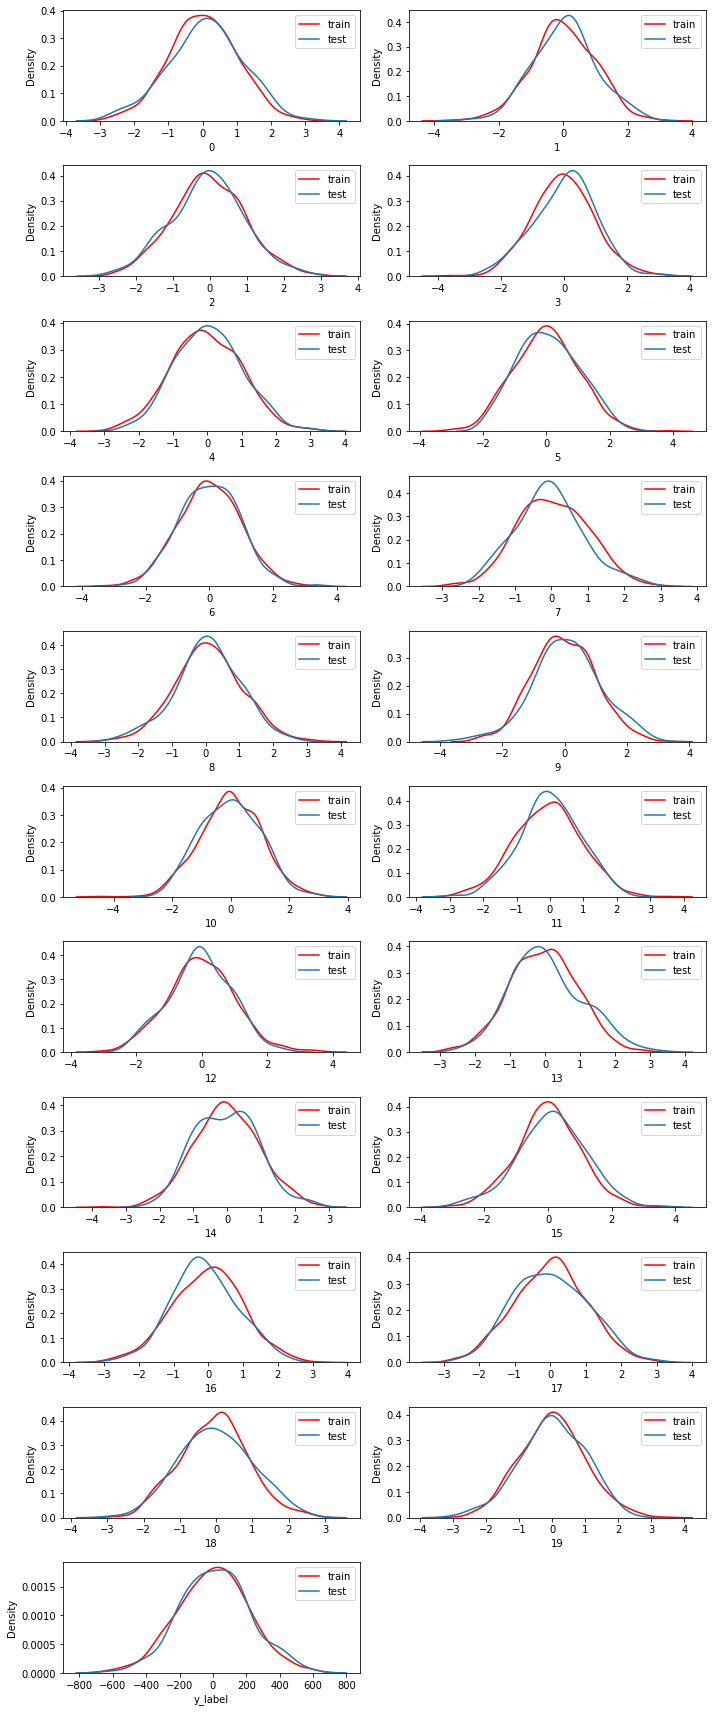

In [ ]:
case2.get_train_test_distribution()

In [ ]:
df, diff_cols = case2.is_distribution_different(alpha=0.05)

All the the distributions from test set are similar to train set


In [ ]:
mean_score, std  = case2.get_covariance_shift_score(target_label='y_test', 
                                                    estimator=RandomForestClassifier(max_depth=2), 
                                                    n_folds=3,
                                                    n_repeats=3, 
                                                    random_state=0)


Current selected folds: [0, 200, 400, 600, 800]
new_train shape: (200, 21)
Convert categorical features to integer valued features.
The process took: 0.37 minutes to run
Score for fold 0: [0.5417719290172823, 0.08624939154813892]
new_train shape: (200, 21)
Convert categorical features to integer valued features.
The process took: 0.18 minutes to run
Score for fold 1: [0.43836649949926143, 0.04940898688847494]
new_train shape: (200, 21)
Convert categorical features to integer valued features.
The process took: 0.17 minutes to run
Score for fold 2: [0.47395519594715163, 0.053916674718142266]
new_train shape: (200, 21)
Convert categorical features to integer valued features.
The process took: 0.17 minutes to run
Score for fold 3: [0.46163067751627207, 0.041711246705422526]
Mean score: 0.4789310754949918, Standard deviation: 0.038465961721436466


## tuiautopilotml.pre_modelling.outliers

### handle_outliers()

In [ ]:
from tuiautopilotml.pre_modelling.outliers import handle_outliers

In [ ]:
output_dict, output_df = handle_outliers(df=encoded_df3, 
                                         target_label='segment', 
                                         tot_outlier_pct=4, 
                                         classification=True,
                                         model=RandomForestClassifier(), 
                                         evaluation_metric='accuracy', 
                                         test_size=0.2, 
                                         n_folds=5,
                                         n_repeats=10)

Replace values
mean
Training fold: 0
Custom cv scores:[0.652]
Training fold: 1
Custom cv scores:[0.652, 0.652]
Training fold: 2
Custom cv scores:[0.652, 0.652, 0.651]
Training fold: 3
Custom cv scores:[0.652, 0.652, 0.651, 0.654]
median
Training fold: 0
Custom cv scores:[0.629]
Training fold: 1
Custom cv scores:[0.629, 0.634]
Training fold: 2
Custom cv scores:[0.629, 0.634, 0.653]
Training fold: 3
Custom cv scores:[0.629, 0.634, 0.653, 0.627]
Drop values
Training fold: 0
Custom cv scores:[0.637]
Training fold: 1
Custom cv scores:[0.637, 0.639]
Training fold: 2
Custom cv scores:[0.637, 0.639, 0.655]
Training fold: 3
Custom cv scores:[0.637, 0.639, 0.655, 0.647]
General scores: {'replace_outliers-mean': (0.65225, 0.0010897247358851695), 'replace_outliers-median': (0.63575, 0.010280442597476054), 'drop_outliers-None': (0.6445000000000001, 0.00712390342438751)}
 --------------- Generating final output --------------- 
Current best method: replace_outliers-mean
Params to return:{'strategy':

In [ ]:
#-----------------
# SK-Learn example 
#-----------------

output_dict, output_df = handle_outliers(df=formatted_sk, 
                                         target_label='y_label', 
                                         tot_outlier_pct=4, 
                                         classification=False,
                                         model=RandomForestRegressor(), 
                                         evaluation_metric='neg_mean_absolute_error', 
                                         test_size=0.2, 
                                         n_folds=5,
                                         n_repeats=10)

Replace values
mean
Training fold: 0
Custom cv scores:[83.44460185395155]
Training fold: 1
Custom cv scores:[83.44460185395155, 88.59549585666478]
Training fold: 2
Custom cv scores:[83.44460185395155, 88.59549585666478, 91.7703678960937]
Training fold: 3
Custom cv scores:[83.44460185395155, 88.59549585666478, 91.7703678960937, 92.22117274246301]
median
Training fold: 0
Custom cv scores:[84.89438328112296]
Training fold: 1
Custom cv scores:[84.89438328112296, 89.99539162608777]
Training fold: 2
Custom cv scores:[84.89438328112296, 89.99539162608777, 92.72231171405728]
Training fold: 3
Custom cv scores:[84.89438328112296, 89.99539162608777, 92.72231171405728, 90.48824641867324]
Drop values
Training fold: 0
Custom cv scores:[83.90915349071682]
Training fold: 1
Custom cv scores:[83.90915349071682, 88.53696250350984]
Training fold: 2
Custom cv scores:[83.90915349071682, 88.53696250350984, 92.2784150120105]
Training fold: 3
Custom cv scores:[83.90915349071682, 88.53696250350984, 92.278415012

## tuiautopilotml.pre_modelling.feature_importance

### BestFeatures()

In [ ]:
from tuiautopilotml.pre_modelling.feature_importance import BestFeatures, get_reduced_features_cv_scores

In [ ]:
case = BestFeatures(df=encoded_df3, target_label='segment', classification=True) 

In [ ]:
case.univariate_feature_selection(k=5)

['mosaic',
 'tratingnew',
 'household_income___median_income',
 'affluence',
 'boardscore']

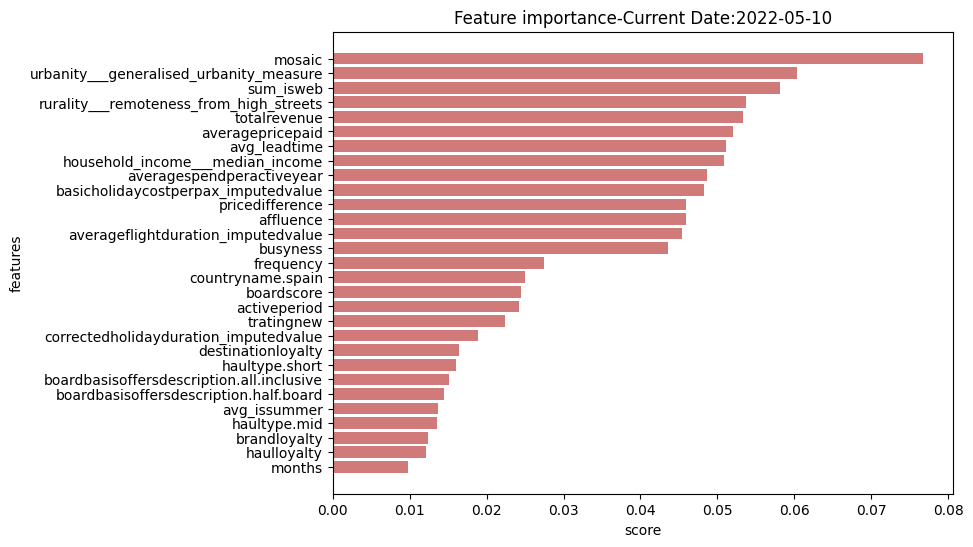

,importance
mosaic,0.076773
urbanity___generalised_urbanity_measure,0.060414
sum_isweb,0.058117
rurality___remoteness_from_high_streets,0.053690
totalrevenue,0.053367
averagepricepaid,0.052040
avg_leadtime,0.051162
household_income___median_income,0.050807
averagespendperactiveyear,0.048598
basicholidaycostperpax_imputedvalue,0.048282


In [ ]:
case.model_feature_selection(model_name='RF')

In [ ]:
case.l1_feature_selection(penalty="l1", c=1)

Index(['mosaic', 'avg_leadtime', 'averageflightduration_imputedvalue',
       'averagepricepaid', 'busyness', 'basicholidaycostperpax_imputedvalue',
       'averagespendperactiveyear', 'totalrevenue', 'pricedifference',
       'tratingnew', 'correctedholidayduration_imputedvalue', 'frequency',
       'activeperiod', 'household_income___median_income', 'affluence',
       'urbanity___generalised_urbanity_measure',
       'rurality___remoteness_from_high_streets', 'sum_isweb', 'boardscore',
       'countryname.spain', 'boardbasisoffersdescription.all.inclusive',
       'haultype.mid', 'destinationloyalty', 'brandloyalty', 'haultype.short',
       'haulloyalty', 'avg_issummer', 'boardbasisoffersdescription.half.board',
       'months'],
      dtype='object')

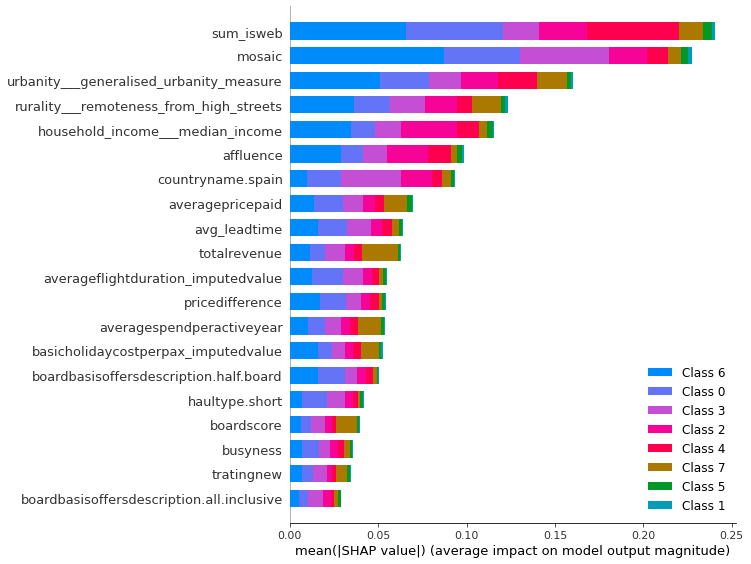

In [ ]:
case.compute_shapley_value_per_feature(model_name='RF', df_size=0.20)

In [ ]:
scores_dict, output_df = get_reduced_features_cv_scores(df=encoded_df3, 
                                                        target_label='segment', 
                                                        model_name='RF', 
                                                        classification=True)

Selected features are: Index(['mosaic', 'avg_leadtime', 'averageflightduration_imputedvalue',
       'averagepricepaid', 'busyness', 'basicholidaycostperpax_imputedvalue',
       'averagespendperactiveyear', 'totalrevenue', 'pricedifference',
       'household_income___median_income', 'affluence',
       'urbanity___generalised_urbanity_measure',
       'rurality___remoteness_from_high_streets', 'sum_isweb'],
      dtype='object')
The process took: 0.06 minutes to run
The process took: 0.06 minutes to run
Scores: {'reduced_x': [0.6275999999999999, 0.010537551897855602], 'x_all': [0.6546000000000001, 0.003136877428271627]}
***********Generating final output***********


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


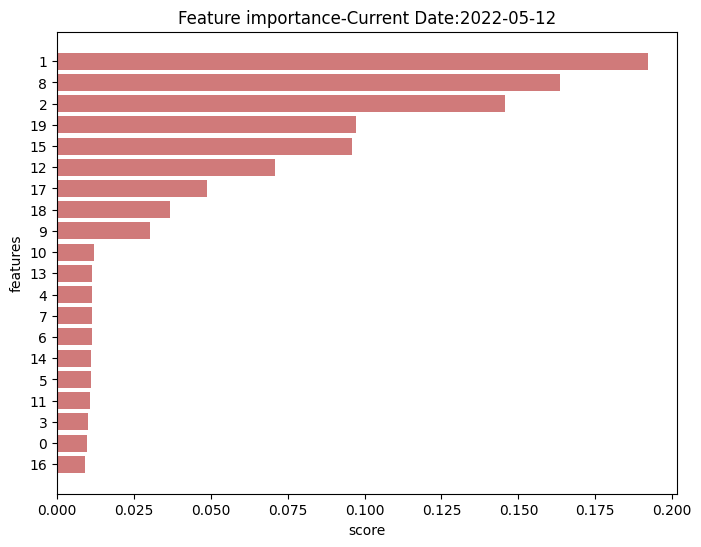

,importance
1,0.191979
8,0.163579
2,0.145613
19,0.097213
15,0.095781
12,0.070851
17,0.048917
18,0.036592
9,0.030366
10,0.012037


In [ ]:
#-----------------
# SK-Learn example 
#-----------------

case2 = BestFeatures(df=formatted_sk, target_label='y_label', classification=False) 

case2.model_feature_selection(model_name='RF')

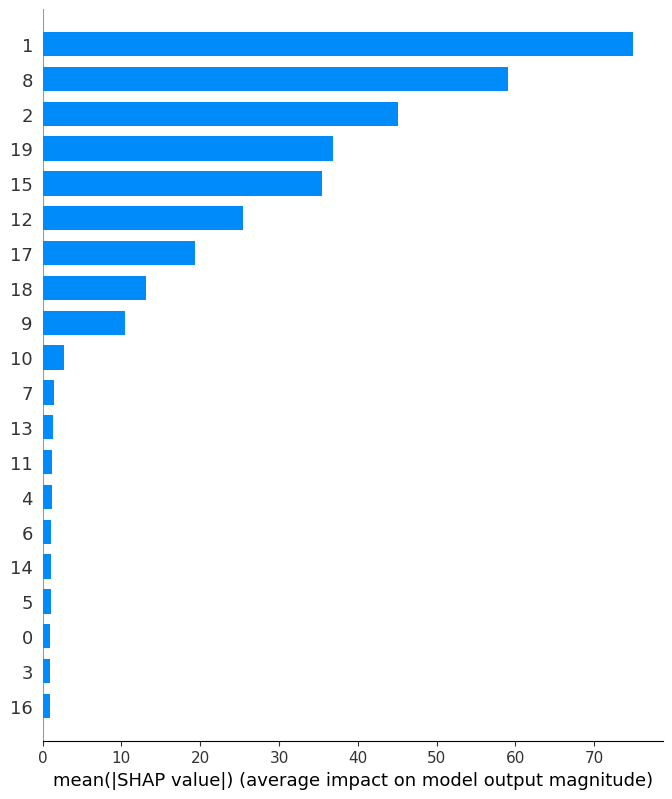

In [ ]:
case2.compute_shapley_value_per_feature(model_name='RF', df_size=1)

## tuiautopilotml.modelling

### evaluate_models_wrapper()

In [ ]:
from tuiautopilotml.modelling.ml_models import evaluate_models_wrapper
from tuiautopilotml.constants import models_list_default
from tuiautopilotml.dicts import scalers

Adding stacked version to models dict..


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished


The process took: 0.02 minutes to run
Score for KNN: [0.48060147874386705, 0.011538250279071183]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


The process took: 0.02 minutes to run
Score for ADA: [0.3759743849549418, 0.09148827395300108]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.7s finished


The process took: 0.18 minutes to run
Score for MLP: [0.5994012482017402, 0.0046512612334978715]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.8s finished


The process took: 0.03 minutes to run
Score for RF: [0.6512004921944783, 0.002808246630649277]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


The process took: 0.01 minutes to run
Score for NB: [0.400594070861698, 0.021203053029416614]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


The process took: 0.06 minutes to run
Score for SVC: [0.5733991256970695, 0.0086526840932675]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


The process took: 0.35 minutes to run
Score for XGB: [0.6808010546750194, 0.00392474746145516]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.1min finished


The process took: 2.08 minutes to run
Score for STACKED: [0.6816019749231427, 0.007135345401587041]
{'KNN': [0.48060147874386705, 0.011538250279071183], 'ADA': [0.3759743849549418, 0.09148827395300108], 'MLP': [0.5994012482017402, 0.0046512612334978715], 'RF': [0.6512004921944783, 0.002808246630649277], 'NB': [0.400594070861698, 0.021203053029416614], 'SVC': [0.5733991256970695, 0.0086526840932675], 'XGB': [0.6808010546750194, 0.00392474746145516], 'STACKED': [0.6816019749231427, 0.007135345401587041]}
Generating graph


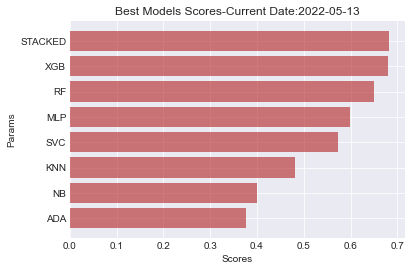

Saving figure/table to disk...
Final scores: {'KNN': [0.48060147874386705, 0.011538250279071183], 'ADA': [0.3759743849549418, 0.09148827395300108], 'MLP': [0.5994012482017402, 0.0046512612334978715], 'RF': [0.6512004921944783, 0.002808246630649277], 'NB': [0.400594070861698, 0.021203053029416614], 'SVC': [0.5733991256970695, 0.0086526840932675], 'XGB': [0.6808010546750194, 0.00392474746145516], 'STACKED': [0.6816019749231427, 0.007135345401587041]}


/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[11:29:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ................................ score: (test=0.464) total time=   0.6s
[CV] END ................................ score: (test=0.598) total time=  10.5s
[CV] END ................................ score: (test=0.654) total time=   1.8s
[CV] END ................................ score: (test=0.419) total time=   0.0s
[CV] END ................................ score: (test=0.569) total time=   3.3s
[11:32:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ....................

/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/carlosdelacruz/miniconda

[CV] END ................................ score: (test=0.490) total time=   0.6s
[CV] END ................................ score: (test=0.456) total time=   0.7s
[CV] END ................................ score: (test=0.594) total time=  10.6s
[CV] END ................................ score: (test=0.653) total time=   1.8s
[CV] END ................................ score: (test=0.371) total time=   0.0s
[11:32:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ................................ score: (test=0.677) total time=  20.6s
[11:32:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eva

/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages

In [ ]:
best_scores, best_method = evaluate_models_wrapper(df=encoded_df3, 
                                                   target_label='segment', 
                                                   models_list=models_list_default, 
                                                   scaled_df=True,
                                                   scaler=scalers['Standard'], 
                                                   classification=True, 
                                                   evaluation_metric='accuracy', 
                                                   stacking=True, 
                                                   n_folds=3, 
                                                   random_state=0,
                                                   k_fold_method='k_fold', 
                                                   is_tuned_params=False, 
                                                   tuned_params=None)

In [ ]:
best_method

StackingClassifier(cv=3,
                   estimators=[('SVC', SVC()),
                               ('RF', RandomForestClassifier(random_state=0)),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              enable_categorical=False,
                                              gamma=None, gpu_id=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,...
                                              predictor=None, random_state=0,
                        

[CV] END ................................ score: (test=0.585) total time=   3.0s
[CV] END ................................ score: (test=0.653) total time=   1.9s
[CV] END ................................ score: (test=0.424) total time=   0.9s
[CV] END ................................ score: (test=0.464) total time=   0.9s
[CV] END ................................ score: (test=0.419) total time=   0.0s
[CV] END ................................ score: (test=0.594) total time=  15.0s


/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.4s finished


The process took: 0.06 minutes to run
Score for NB: {'fit_time': 0.01767388979593913, 'score_time': 0.026634057362874348, 'test_accuracy': 0.400594070861698, 'test_f1_score': 0.3295241104135341, 'test_precision_score': 0.3404266751124925, 'test_recall_score': 0.3900840602592898}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.3s finished


The process took: 0.43 minutes to run
Score for XGB: {'fit_time': 23.722578366597492, 'score_time': 0.04885546366373698, 'test_accuracy': 0.6808011746990338, 'test_f1_score': 0.5644573299194047, 'test_precision_score': 0.6295237717067371, 'test_recall_score': 0.5368082592269646}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


The process took: 0.02 minutes to run
Score for KNN: {'fit_time': 0.005659262339274089, 'score_time': 0.6889034112294515, 'test_accuracy': 0.4631984767512283, 'test_f1_score': 0.3141627139504222, 'test_precision_score': 0.35381949907128313, 'test_recall_score': 0.30376115314244345}


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.0s finished


The process took: 0.07 minutes to run
Score for SVC: {'fit_time': 2.055475870768229, 'score_time': 1.8451040585835774, 'test_accuracy': 0.5310004025605443, 'test_f1_score': 0.3200130509599938, 'test_precision_score': 0.3271588989325933, 'test_recall_score': 0.32373398837393236}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.4s finished


The process took: 0.04 minutes to run
Score for RF: {'fit_time': 2.1547383467356362, 'score_time': 0.09688170750935872, 'test_accuracy': 0.6510002921384511, 'test_f1_score': 0.4812531803138729, 'test_precision_score': 0.5838639657887131, 'test_recall_score': 0.4636203716766574}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished


The process took: 0.02 minutes to run
Score for ADA: {'fit_time': 0.9495119253794352, 'score_time': 0.07778406143188477, 'test_accuracy': 0.3759743849549418, 'test_f1_score': 0.30777927880602873, 'test_precision_score': 0.3578075315825324, 'test_recall_score': 0.3560916488512968}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.8s finished


The process took: 0.23 minutes to run
Score for MLP: {'fit_time': 13.698524634043375, 'score_time': 0.0207974910736084, 'test_accuracy': 0.5960044485700698, 'test_f1_score': 0.4336398433256246, 'test_precision_score': 0.4723766936574039, 'test_recall_score': 0.4217017905309945}
{'NB': [0.400594070861698, 0], 'XGB': [0.6808011746990338, 0], 'KNN': [0.4631984767512283, 0], 'SVC': [0.5310004025605443, 0], 'RF': [0.6510002921384511, 0], 'ADA': [0.3759743849549418, 0], 'MLP': [0.5960044485700698, 0]}
Obtaining graph


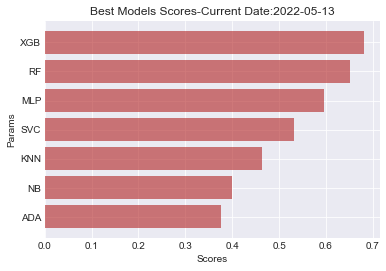

Saving figure/table to disk...
Final scores: {'NB': {'fit_time': 0.01767388979593913, 'score_time': 0.026634057362874348, 'test_accuracy': 0.400594070861698, 'test_f1_score': 0.3295241104135341, 'test_precision_score': 0.3404266751124925, 'test_recall_score': 0.3900840602592898}, 'XGB': {'fit_time': 23.722578366597492, 'score_time': 0.04885546366373698, 'test_accuracy': 0.6808011746990338, 'test_f1_score': 0.5644573299194047, 'test_precision_score': 0.6295237717067371, 'test_recall_score': 0.5368082592269646}, 'KNN': {'fit_time': 0.005659262339274089, 'score_time': 0.6889034112294515, 'test_accuracy': 0.4631984767512283, 'test_f1_score': 0.3141627139504222, 'test_precision_score': 0.35381949907128313, 'test_recall_score': 0.30376115314244345}, 'SVC': {'fit_time': 2.055475870768229, 'score_time': 1.8451040585835774, 'test_accuracy': 0.5310004025605443, 'test_f1_score': 0.3200130509599938, 'test_precision_score': 0.3271588989325933, 'test_recall_score': 0.32373398837393236}, 'RF': {'fit_

/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[12:11:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[12:11:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/carlosdelacruz/miniconda

In [ ]:
# BUG: multi score crashes with function get_best_score 

best_scores2, best_method2 = evaluate_models_wrapper(df=encoded_df3, 
                                                   target_label='segment', 
                                                   models_list=models_list_default, 
                                                   scaled_df=True,
                                                   scaler=scalers['MinMax'], 
                                                   classification=True, 
                                                   multiple_eval_scores=True,
                                                   evaluation_metric='accuracy', 
                                                   stacking=False, 
                                                   n_folds=3, 
                                                   n_repeats=2,
                                                   k_fold_method='k_fold', 
                                                   verbose=1, 
                                                   n_jobs=-1
                                            )

Adding stacked version to models dict..


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished


The process took: 0.01 minutes to run
Score for CART: [-146.38417213891526, 3.667573404642681]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


The process took: 0.03 minutes to run
Score for MLP: [-21.82202908576073, 1.571138912091579]
The process took: 0.0 minutes to run
Score for LR: [-2.318058844933997e-13, 3.15054309523058e-14]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


The process took: 0.0 minutes to run
Score for KNN: [-111.27675647425184, 2.726980932453391]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


The process took: 0.03 minutes to run
Score for XGB: [-80.34500708590255, 1.6630309329505297]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


The process took: 0.03 minutes to run
Score for RF: [-89.99387655980597, 0.06787754831586473]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.0s finished


The process took: 0.27 minutes to run
Score for STACKED: [-3.1820892512902796e-13, 5.631721917331512e-15]
Generating graph


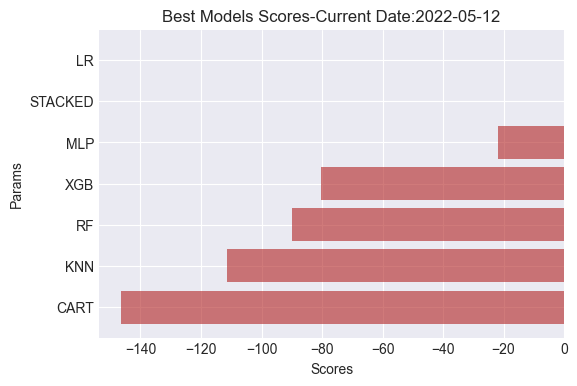

Saving figure/table to disk...
Final scores: {'CART': [-146.38417213891526, 3.667573404642681], 'MLP': [-21.82202908576073, 1.571138912091579], 'LR': [-2.318058844933997e-13, 3.15054309523058e-14], 'KNN': [-111.27675647425184, 2.726980932453391], 'XGB': [-80.34500708590255, 1.6630309329505297], 'RF': [-89.99387655980597, 0.06787754831586473], 'STACKED': [-3.1820892512902796e-13, 5.631721917331512e-15]}


In [ ]:
#-----------------
# SK-Learn example 
#-----------------
best_scores, best_method = evaluate_models_wrapper(df=formatted_sk, 
                                                   target_label='y_label', 
                                                   models_list=['KNN', 'LR', 'CART', 'MLP', 'RF', 'XGB'], 
                                                   scaled_df=True,
                                                   scaler=scalers['Standard'], 
                                                   classification=False, 
                                                   evaluation_metric='neg_mean_absolute_error', 
                                                   stacking=True, 
                                                   n_folds=3 ) 

### cv_eval_mlp()

In [ ]:
from tuiautopilotml.modelling.neural_nets import cv_eval_mlp
from sklearn.preprocessing import StandardScaler

In [ ]:
results, model = cv_eval_mlp(df=encoded_df3, 
                                    target_label= 'segment', 
                                    activation_f_type='classif', 
                                    optimizer='adam', 
                                    regulator=20,
                                    hl_activation='relu', 
                                    evaluation_metric='accuracy', 
                                    metric_to_monitor='loss', 
                                    mode='min',
                                    epochs=100, 
                                    batch_size=128, 
                                    n_folds=3, 
                                    n_repeats=3, 
                                    patience=2, 
                                    verbose=1, 
                                    random_state=0, 
                                    scaler=StandardScaler())

Number of neurons: 304-121-55
Epoch 1/100
27/27 [==============================] - 1s 4ms/step - loss: 0.4283 - accuracy: 0.2679
Epoch 2/100
27/27 [==============================] - 0s 5ms/step - loss: 0.3105 - accuracy: 0.4161
Epoch 3/100
27/27 [==============================] - 0s 6ms/step - loss: 0.2891 - accuracy: 0.4722
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 0.2772 - accuracy: 0.5023
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 0.2692 - accuracy: 0.5257
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 0.2628 - accuracy: 0.5281
Epoch 7/100
27/27 [==============================] - 0s 5ms/step - loss: 0.2566 - accuracy: 0.5425
Epoch 8/100
27/27 [==============================] - 0s 5ms/step - loss: 0.2518 - accuracy: 0.5425
Epoch 9/100
27/27 [==============================] - 0s 4ms/step - loss: 0.2482 - accuracy: 0.5542
Epoch 10/100
27/27 [==============================] - 0s 5ms/step - loss: 0.242

27/27 [==============================] - 0s 5ms/step - loss: 0.2282 - accuracy: 0.5941
Epoch 16/100
27/27 [==============================] - 0s 4ms/step - loss: 0.2234 - accuracy: 0.5995
Epoch 17/100
27/27 [==============================] - 0s 5ms/step - loss: 0.2246 - accuracy: 0.6031
Epoch 18/100
27/27 [==============================] - 0s 5ms/step - loss: 0.2200 - accuracy: 0.5998
Epoch 19/100
27/27 [==============================] - 0s 5ms/step - loss: 0.2195 - accuracy: 0.6127
Epoch 20/100
27/27 [==============================] - 0s 5ms/step - loss: 0.2149 - accuracy: 0.6118
Epoch 21/100
27/27 [==============================] - 0s 4ms/step - loss: 0.2135 - accuracy: 0.6223
Epoch 22/100
27/27 [==============================] - 0s 4ms/step - loss: 0.2115 - accuracy: 0.6256
Epoch 23/100
27/27 [==============================] - 0s 6ms/step - loss: 0.2107 - accuracy: 0.6247
Epoch 24/100
27/27 [==============================] - 0s 5ms/step - loss: 0.2095 - accuracy: 0.6292
Epoch 25/100


In [ ]:
results

{'mlp_model': [0.6078675821458357, 0.010408139400140922]}

In [ ]:
model

In [ ]:
#-----------------
# SK-Learn example 
#-----------------
results, model = cv_eval_mlp(df=formatted_sk, 
                                    target_label= 'y_label', 
                                    activation_f_type='reg', 
                                    optimizer='adam', 
                                    regulator=20,
                                    hl_activation='relu', 
                                    evaluation_metric='mean_absolute_error', 
                                    metric_to_monitor='loss', 
                                    mode='min',
                                    epochs=100, 
                                    batch_size=128, 
                                    n_folds=3, 
                                    n_repeats=3, 
                                    patience=2, 
                                    verbose=1, 
                                    random_state=0, 
                                    scaler=StandardScaler())

Number of neurons: 2828-1131-514
Epoch 1/100
6/6 [==============================] - 1s 81ms/step - loss: 47017.3125 - mean_absolute_error: 171.4320
Epoch 2/100
6/6 [==============================] - 1s 84ms/step - loss: 46142.9531 - mean_absolute_error: 169.6944
Epoch 3/100
6/6 [==============================] - 1s 87ms/step - loss: 40220.9102 - mean_absolute_error: 157.6498
Epoch 4/100
6/6 [==============================] - 1s 84ms/step - loss: 24703.9512 - mean_absolute_error: 117.5347
Epoch 5/100
6/6 [==============================] - 1s 107ms/step - loss: 9117.7178 - mean_absolute_error: 64.5982
Epoch 6/100
6/6 [==============================] - 1s 121ms/step - loss: 5399.6943 - mean_absolute_error: 59.8242
Epoch 7/100
6/6 [==============================] - 1s 100ms/step - loss: 2126.3752 - mean_absolute_error: 36.1686
Epoch 8/100
6/6 [==============================] - 1s 93ms/step - loss: 1765.6592 - mean_absolute_error: 31.1873
Epoch 9/100
6/6 [==============================] - 1

6/6 [==============================] - 1s 196ms/step - loss: 416.4805 - mean_absolute_error: 15.4562
Epoch 15/100
6/6 [==============================] - 1s 133ms/step - loss: 387.3452 - mean_absolute_error: 15.3175
Epoch 16/100
6/6 [==============================] - 1s 142ms/step - loss: 400.5476 - mean_absolute_error: 15.2240
Epoch 17/100
6/6 [==============================] - 1s 131ms/step - loss: 325.2259 - mean_absolute_error: 13.9408
Epoch 18/100
6/6 [==============================] - 1s 134ms/step - loss: 337.6155 - mean_absolute_error: 14.1626
Epoch 19/100
6/6 [==============================] - 1s 157ms/step - loss: 327.1731 - mean_absolute_error: 13.7213
Epoch 00019: early stopping
3/3 [==============================] - 0s 23ms/step
Number of neurons: 2828-1131-514
Epoch 1/100
6/6 [==============================] - 3s 221ms/step - loss: 45409.9688 - mean_absolute_error: 170.2552
Epoch 2/100
6/6 [==============================] - 1s 123ms/step - loss: 44515.8359 - mean_absolute_

In [ ]:
results

{'mlp_model': [540.9544443370268, 156.3912472768009]}

## tuiautopilotml.hyper_opti

### hyperopt_parameter_tuning_cv()

In [ ]:
from tuiautopilotml.hyper_opti import hyperopt_parameter_tuning_cv

In [ ]:
results, params, best_model= hyperopt_parameter_tuning_cv(df=encoded_df3,
                                                                    target_label='segment',
                                                                    model_name='RF',
                                                                    max_evals=10,
                                                                    k_fold_method='k_fold',
                                                                    n_folds=3,
                                                                    n_repeats=2,
                                                                    classification=True,
                                                                    evaluation_metric='accuracy',
                                                                    timeout_minutes=10.0,
                                                                    n_jobs=-1,
                                                                    verbose=1)


Model name: RF, Parameters: {'n_estimators': <hyperopt.pyll.base.Apply object at 0x7fa1930a6fd0>, 'max_depth': <hyperopt.pyll.base.Apply object at 0x7fa1930a6550>, 'max_features': <hyperopt.pyll.base.Apply object at 0x7fa1930a69d0>, 'min_samples_split': <hyperopt.pyll.base.Apply object at 0x7fa1930a6b10>, 'min_samples_leaf': <hyperopt.pyll.base.Apply object at 0x7fa1930a6e90>, 'bootstrap': <hyperopt.pyll.base.Apply object at 0x7fa1930a6f90>}
  0%|                                    | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007380 seconds
INFO:hyperopt.tpe:TPE using 0 trials
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   46.7s finished



The process took: 0.78 minutes to run
Accuracy: 0.5738003659772247                                                    
 10%|▉        | 1/10 [00:46<07:02, 46.92s/trial, best loss: -0.5738003659772247]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009090 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss -0.573800
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



The process took: 0.35 minutes to run                                           


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.5s finished



Accuracy: 0.3629983487096098
 20%|█▊       | 2/10 [01:07<04:12, 31.61s/trial, best loss: -0.5738003659772247]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011544 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss -0.573800
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



The process took: 0.26 minutes to run                                           
Accuracy: 0.3917970307499124                                                    
 30%|██▋      | 3/10 [01:23<02:49, 24.27s/trial, best loss: -0.5738003659772247]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.3s finished

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007579 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss -0.573800
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



The process took: 0.3 minutes to run                                            
Accuracy: 0.4549980760150491                                                    
 40%|███▌     | 4/10 [01:41<02:10, 21.80s/trial, best loss: -0.5738003659772247]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   17.8s finished

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008496 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss -0.573800
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



The process took: 0.19 minutes to run                                           
Accuracy: 0.38959711058988683                                                   
 50%|████▌    | 5/10 [01:53<01:30, 18.16s/trial, best loss: -0.5738003659772247]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.5s finished

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009497 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss -0.573800
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



The process took: 0.24 minutes to run                                           
Accuracy: 0.3631983087176082                                                    
 60%|█████▍   | 6/10 [02:07<01:07, 16.85s/trial, best loss: -0.5738003659772247]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.1s finished

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009275 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss -0.573800
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



 60%|█████▍   | 6/10 [02:15<01:07, 16.85s/trial, best loss: -0.5738003659772247]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.7s finished



The process took: 0.13 minutes to run                                           
Accuracy: 0.48339611789526854                                                   
 70%|██████▎  | 7/10 [02:15<00:41, 14.00s/trial, best loss: -0.5738003659772247]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.017724 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss -0.573800
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



The process took: 0.2 minutes to run                                            
Accuracy: 0.48219551767917723                                                   
 80%|███████▏ | 8/10 [02:27<00:26, 13.47s/trial, best loss: -0.5738003659772247]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.1s finished

INFO:hyperopt.tpe:build_posterior_wrapper took 0.025115 seconds
INFO:hyperopt.tpe:TPE using 8/8 trials with best loss -0.573800
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



The process took: 0.26 minutes to run                                           
Accuracy: 0.4511936748304601                                                    
 90%|████████ | 9/10 [02:43<00:14, 14.08s/trial, best loss: -0.5738003659772247]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.2s finished

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006705 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss -0.573800
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



The process took: 0.22 minutes to run                                           
Accuracy: 0.4781955973751228                                                    
100%|████████| 10/10 [02:56<00:00, 13.81s/trial, best loss: -0.5738003659772247]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.0s finished



100%|████████| 10/10 [02:56<00:00, 17.65s/trial, best loss: -0.5738003659772247]
optimization complete
Results:{'RF': (0.5738003659772247, 0.011826198129453012)}


In [ ]:
results

{'RF': (0.5738003659772247, 0.011826198129453012)}

In [ ]:
params

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 0.1,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 2000,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# ----
# MLP
# ----

results, params, best_model= hyperopt_parameter_tuning_cv(df=encoded_df3,
                                                                    target_label='segment',
                                                                    model_name='MLP',
                                                                    max_evals=10,
                                                                    k_fold_method='k_fold',
                                                                    n_folds=3,
                                                                    n_repeats=2,
                                                                    classification=True,
                                                                    evaluation_metric='accuracy',
                                                                    timeout_minutes=10.0,
                                                                    n_jobs=-1,
                                                                    verbose=1)


Model name: MLP, Parameters: {'input_n': <hyperopt.pyll.base.Apply object at 0x7ff6e9fb2890>, 'units1': <hyperopt.pyll.base.Apply object at 0x7ff6e9fb2ad0>, 'units2': <hyperopt.pyll.base.Apply object at 0x7ff6e9fb2d10>, 'dropout1': <hyperopt.pyll.base.Apply object at 0x7ff6e9fb2f50>, 'dropout2': <hyperopt.pyll.base.Apply object at 0x7ff6e9fb8110>, 'batch_size': <hyperopt.pyll.base.Apply object at 0x7ff6e9fb8290>, 'optimizer': <hyperopt.pyll.base.Apply object at 0x7ff6e9fb8450>, 'epochs': <hyperopt.pyll.base.Apply object at 0x7ff6e9fb85d0>}
  0%|                                    | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004454 seconds
INFO:hyperopt.tpe:TPE using 0 trials
ERROR:hyperopt.fmin:job exception: Invalid parameter dropout1 for estimator MLPClassifier(batch_size=128, max_iter=300, random_state=0). Check the list of available parameters with `estimator.get_params().keys()`.


  0%|                                    | 0/10 [00:00<?, ?trial/s, best loss=?]


ValueError: Invalid parameter dropout1 for estimator MLPClassifier(batch_size=128, max_iter=300, random_state=0). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
#-----------------
# SK-Learn example 
#-----------------

results, params, best_model= hyperopt_parameter_tuning_cv(df=formatted_sk,
                                                                    target_label='y_label',
                                                                    model_name='RF',
                                                                    max_evals=10,
                                                                    k_fold_method='k_fold',
                                                                    n_folds=3,
                                                                    n_repeats=2,
                                                                    classification=False,
                                                                    evaluation_metric='neg_mean_absolute_error',
                                                                    timeout_minutes=2,
                                                                    n_jobs=-1,
                                                                    verbose=1)


Model name: RF, Parameters: {'n_estimators': <hyperopt.pyll.base.Apply object at 0x7fa60a0c7f10>, 'max_depth': <hyperopt.pyll.base.Apply object at 0x7fa60a0cf310>, 'max_features': <hyperopt.pyll.base.Apply object at 0x7fa60a0cf710>, 'min_samples_split': <hyperopt.pyll.base.Apply object at 0x7fa60a0cf950>, 'min_samples_leaf': <hyperopt.pyll.base.Apply object at 0x7fa60a0cfbd0>, 'bootstrap': <hyperopt.pyll.base.Apply object at 0x7fa60a0cfe10>}
  0%|                                    | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005326 seconds
INFO:hyperopt.tpe:TPE using 0 trials
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



The process took: 0.08 minutes to run                                           
Accuracy: -145.39293576926445                                                   
  0%|                                    | 0/10 [00:04<?, ?trial/s, best loss=?]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.5s finished



 10%|█         | 1/10 [00:04<00:42,  4.71s/trial, best loss: 145.39293576926445]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.024153 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 145.392936
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



The process took: 0.1 minutes to run                                            
Accuracy: -137.7351159853946                                                    
 20%|██▏        | 2/10 [00:10<00:44,  5.59s/trial, best loss: 137.7351159853946]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.9s finished

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010570 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 137.735116
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



 20%|██▏        | 2/10 [00:21<00:44,  5.59s/trial, best loss: 137.7351159853946]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.4s finished



The process took: 0.18 minutes to run                                           
Accuracy: -150.41490417081175                                                   
 30%|███▎       | 3/10 [00:21<00:56,  8.07s/trial, best loss: 137.7351159853946]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.016677 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 137.735116
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



The process took: 0.13 minutes to run                                           
                                                                                

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.5s finished



Accuracy: -154.03939463557046
 40%|████▍      | 4/10 [00:29<00:47,  7.98s/trial, best loss: 137.7351159853946]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015943 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 137.735116
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



The process took: 0.09 minutes to run                                           
Accuracy: -125.24962250836366                                                   
 50%|█████     | 5/10 [00:35<00:34,  6.99s/trial, best loss: 125.24962250836366]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.0s finished

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011443 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 125.249623
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



The process took: 0.1 minutes to run                                            
Accuracy: -135.91342871961726                                                   
 60%|██████    | 6/10 [00:41<00:26,  6.69s/trial, best loss: 125.24962250836366]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.9s finished

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006390 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 125.249623
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



 60%|██████    | 6/10 [00:51<00:26,  6.69s/trial, best loss: 125.24962250836366]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.8s finished



The process took: 0.18 minutes to run                                           
Accuracy: -137.63256113183624                                                   
 70%|███████   | 7/10 [00:52<00:24,  8.11s/trial, best loss: 125.24962250836366]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009699 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 125.249623
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



The process took: 0.03 minutes to run                                           
Accuracy: -144.25718795940443                                                   
 80%|████████  | 8/10 [00:53<00:12,  6.07s/trial, best loss: 125.24962250836366]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s finished

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009530 seconds
INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 125.249623
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



The process took: 0.22 minutes to run                                           
Accuracy: -133.3208028552107                                                    
 90%|█████████ | 9/10 [01:07<00:08,  8.30s/trial, best loss: 125.24962250836366]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.0s finished

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008900 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 125.249623
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



The process took: 0.14 minutes to run                                           
Accuracy: -131.49025375294207                                                   
100%|█████████| 10/10 [01:15<00:00,  7.52s/trial, best loss: 125.24962250836366]
optimization complete
Results:{'RF': (-125.24962250836366, 1.9095817681122598)}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.9s finished



In [ ]:
params

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 40,
 'max_features': 5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 0.2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 600,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

### optuna_hyperopt()

In [ ]:
from tuiautopilotml.hyper_opti import optuna_hyperopt

In [ ]:
scores, best_params, model = optuna_hyperopt(df=encoded_df3, 
                                             target_label='segment', 
                                             model_name='XGB', 
                                             n_minutes_limit=2, 
                                             n_trials=100,
                                             params_list=None, 
                                             classification=True, 
                                             evaluation_metric='accuracy', 
                                             test_size=0.2,
                                             direction='maximize')

[I 2022-05-11 12:06:38,117] A new study created in memory with name: no-name-afd8269d-556d-4330-ad1f-4da9061eb184


Generating internal x,y
[12:06:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-05-11 12:06:55,981] Trial 0 finished with value: 0.627 and parameters: {'learning_rate': 0.043039973651522304, 'n_estimators': 900, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 0.17085789237861385, 'subsample': 0.9957206517197161, 'colsample_bytree': 0.5655003767554333, 'reg_alpha': 64.54151862796262}. Best is trial 0 with value: 0.627.


The process took: 0.3 minutes to run
Generating internal x,y
[12:06:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-05-11 12:07:01,291] Trial 1 finished with value: 0.537 and parameters: {'learning_rate': 0.04770269651567717, 'n_estimators': 300, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 0.10049145486627964, 'subsample': 0.8331356603530614, 'colsample_bytree': 0.4214401262030196, 'reg_alpha': 91.9469764271879}. Best is trial 0 with value: 0.627.


The process took: 0.09 minutes to run
Generating internal x,y
[12:07:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-05-11 12:07:11,275] Trial 2 finished with value: 0.569 and parameters: {'learning_rate': 0.048906424789492635, 'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.14599322970214887, 'subsample': 0.8562533750973245, 'colsample_bytree': 0.33024066595869084, 'reg_alpha': 85.30007235492077}. Best is trial 0 with value: 0.627.


The process took: 0.16 minutes to run
Generating internal x,y
[12:07:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-05-11 12:07:23,092] Trial 3 finished with value: 0.547 and parameters: {'learning_rate': 0.09021314743733033, 'n_estimators': 700, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 0.18852659102708308, 'subsample': 0.8264429416680955, 'colsample_bytree': 0.7186810923401487, 'reg_alpha': 98.57073574788006}. Best is trial 0 with value: 0.627.


The process took: 0.19 minutes to run
Generating internal x,y
[12:07:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-05-11 12:07:37,727] Trial 4 finished with value: 0.653 and parameters: {'learning_rate': 0.0670565431455197, 'n_estimators': 700, 'max_depth': 7, 'min_child_weight': 1, 'gamma': 0.31319896235184697, 'subsample': 0.8440493915712717, 'colsample_bytree': 0.37942921660523643, 'reg_alpha': 35.60490131426249}. Best is trial 4 with value: 0.653.


The process took: 0.24 minutes to run
Generating internal x,y
[12:07:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-05-11 12:07:56,136] Trial 5 finished with value: 0.651 and parameters: {'learning_rate': 0.04949623008605263, 'n_estimators': 700, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.2825182018078613, 'subsample': 0.8873027962392984, 'colsample_bytree': 0.33796832685529826, 'reg_alpha': 32.797354840376116}. Best is trial 4 with value: 0.653.


The process took: 0.3 minutes to run
Generating internal x,y
[12:07:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-05-11 12:07:59,335] Trial 6 pruned. 


The process took: 0.05 minutes to run
Generating internal x,y
[12:07:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-05-11 12:08:18,474] Trial 7 pruned. 


The process took: 0.32 minutes to run
Generating internal x,y
[12:08:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-05-11 12:08:35,347] Trial 8 pruned. 


The process took: 0.28 minutes to run
Generating internal x,y
[12:08:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-05-11 12:08:54,750] Trial 9 finished with value: 0.608 and parameters: {'learning_rate': 0.043514935478749656, 'n_estimators': 1100, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.043515155197994294, 'subsample': 0.8890588530521447, 'colsample_bytree': 0.48648652917261354, 'reg_alpha': 72.69317407672283}. Best is trial 4 with value: 0.653.


The process took: 0.32 minutes to run
Best hyperparameters: {'learning_rate': 0.0670565431455197, 'n_estimators': 700, 'max_depth': 7, 'min_child_weight': 1, 'gamma': 0.31319896235184697, 'subsample': 0.8440493915712717, 'colsample_bytree': 0.37942921660523643, 'reg_alpha': 35.60490131426249}
Best score: 0.653
Saving results to disk
Saving figure/table to disk...


ImportError: Tried to import 'plotly' but failed. Please make sure that the package is installed correctly to use this feature. Actual error: No module named 'plotly'.

##  tuiautopilotml.auto_mode.autopilot_mode()

In [ ]:
from tuiautopilotml.auto_mode import autopilot_mode
from tuiautopilotml.dicts import scalers, models

Current run_id: 12
-------------------------------
JOB:0: dataframe_transformation
-------------------------------
convert_to_int_float_date DONE
Converting columns to lowercase
Ran 3 checks on the dataframe
All the checks were passed..
Your dataframe seems to be correct. We return the original input data
Updating config dataframe_transformation...
----------------------------
JOB:1: handle_missing_values
----------------------------
There are no missing data
---------------
JOB:2: encoding
---------------
Convert categorical features to integer valued features.
Updating config encoding...
---------------------
JOB:3: baseline_score
---------------------
Computing baseline score


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.1s finished


The process took: 0.04 minutes to run
Logging sklearn artifacts...
Find your results here: http://localhost:5000/
Score: 0.6299943121532326 Std:0.010107706456115131
----------------------
JOB:4: handle_outliers
----------------------
Replace values
mean
Training fold: 0
Custom cv scores:[0.68]
Training fold: 1
Custom cv scores:[0.68, 0.63]
Training fold: 2
Custom cv scores:[0.68, 0.63, 0.6225]
Training fold: 3
Custom cv scores:[0.68, 0.63, 0.6225, 0.6575]
median
Training fold: 0
Custom cv scores:[0.6875]
Training fold: 1
Custom cv scores:[0.6875, 0.64]
Training fold: 2
Custom cv scores:[0.6875, 0.64, 0.645]
Training fold: 3
Custom cv scores:[0.6875, 0.64, 0.645, 0.66]
Dropping values
Training fold: 0
Custom cv scores:[0.645]
Training fold: 1
Custom cv scores:[0.645, 0.5775]
Training fold: 2
Custom cv scores:[0.645, 0.5775, 0.5875]
Training fold: 3
Custom cv scores:[0.645, 0.5775, 0.5875, 0.65]
General scores: {'replace_outliers-mean': (0.6475, 0.022844583603121332), 'replace_outliers-m

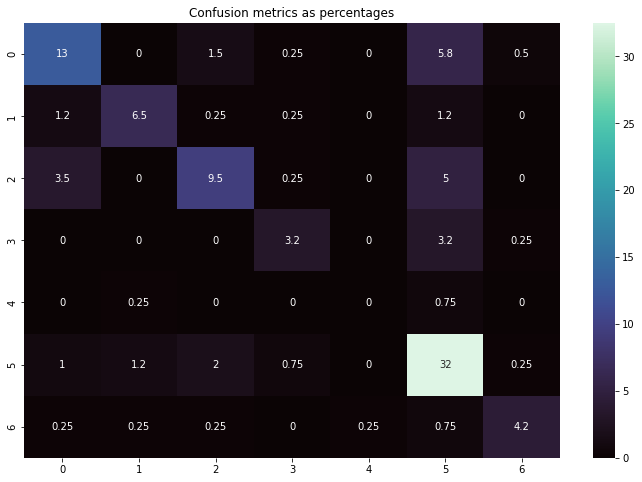

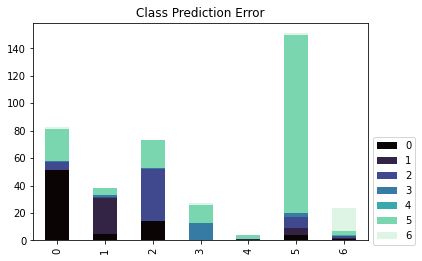

PART 5: Make the prediction. Evaluate only on test data
Kappa score: 0.5807949559067864
PART 6: Plot


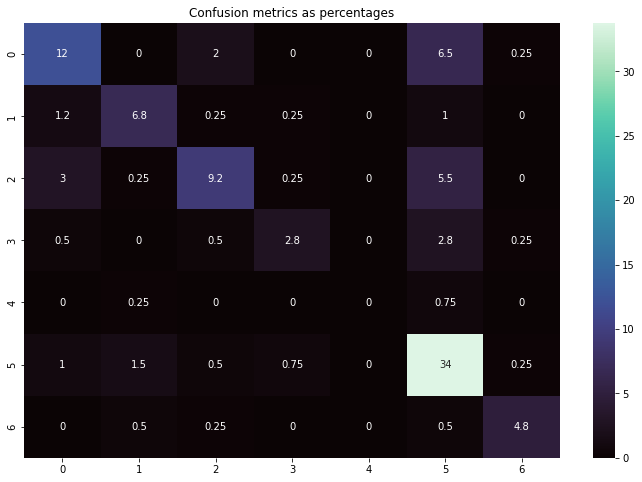

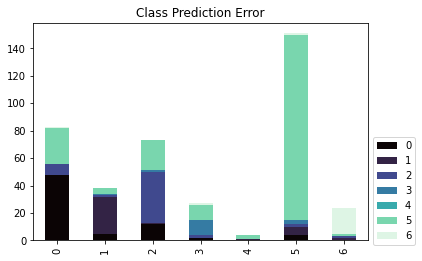

              precision    recall  f1-score   support

           0       0.68      0.58      0.62        83
           2       0.73      0.71      0.72        38
           3       0.73      0.51      0.60        73
           4       0.69      0.41      0.51        27
           5       0.00      0.00      0.00         4
           6       0.67      0.89      0.76       151
           7       0.86      0.79      0.83        24

    accuracy                           0.69       400
   macro avg       0.62      0.56      0.58       400
weighted avg       0.69      0.69      0.68       400

Current scores: {'smote_os': [0.645, None], 'random_os': [0.6925, None]}
----------- Generating final output  -----------
Current best method: random_os
Params to return:{}
returning params_excluded_dict
Generating internal x,y
The process took: 0.01 minutes to run
y counts:{6: 36.199999999999996, 0: 19.35, 3: 18.099999999999998, 2: 10.05, 4: 7.8, 7: 6.2, 5: 1.7500000000000002, 1: 0.5499999999999999}

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


The process took: 0.02 minutes to run
Score for RF: [0.6286082543433312, 0.013331702900914648]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.2s finished


The process took: 0.16 minutes to run
Score for XGB: [0.6570230242056992, 0.016333167283330466]
Obtaining graph


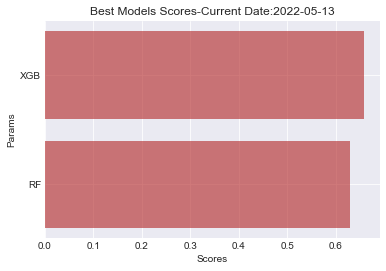

Saving figure/table to disk...
Final scores: {'RF': [0.6286082543433312, 0.013331702900914648], 'XGB': [0.6570230242056992, 0.016333167283330466]}
Previous scores: (0.6925, nan)
New scores: (0.6570230242056992, 0.016333167283330466)
We keep previous results since the new results are not significant
------------------------
JOB:7: feature_selection
------------------------
Selected features are: Index(['mosaic', 'avg_leadtime', 'averageflightduration_imputedvalue',
       'averagepricepaid', 'busyness', 'basicholidaycostperpax_imputedvalue',
       'averagespendperactiveyear', 'pricesensitivity', 'totalrevenue',
       'pricedifference', 'household_income___median_income', 'affluence',
       'urbanity___generalised_urbanity_measure',
       'rurality___remoteness_from_high_streets', 'sum_isweb', 'sum_isretail'],
      dtype='object')
The process took: 0.05 minutes to run
The process took: 0.04 minutes to run
Scores: {'reduced_x': [0.631091425664694, 0.015542021249059535], 'x_all': [0.6

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004590 seconds
INFO:hyperopt.tpe:TPE using 0 trials
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV] END ................................ score: (test=0.507) total time=   2.6s
  0%|                                    | 0/80 [00:02<?, ?trial/s, best loss=?]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s



[CV] END ................................ score: (test=0.465) total time=   2.8s
  0%|                                    | 0/80 [00:05<?, ?trial/s, best loss=?]

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.4s remaining:    0.0s



[CV] END ................................ score: (test=0.451) total time=   2.6s
The process took: 0.14 minutes to run                                           
Accuracy: 0.4740660681626285                                                    
  1%|         | 1/80 [00:08<10:47,  8.20s/trial, best loss: -0.4740660681626285]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.0s finished

INFO:hyperopt.tpe:build_posterior_wrapper took 0.014342 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss -0.474066
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV] END ................................ score: (test=0.425) total time=   2.5s
  1%|         | 1/80 [00:10<10:47,  8.20s/trial, best loss: -0.4740660681626285]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s



[CV] END ................................ score: (test=0.378) total time=   2.4s
  1%|         | 1/80 [00:13<10:47,  8.20s/trial, best loss: -0.4740660681626285]

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s



[CV] END ................................ score: (test=0.382) total time=   4.3s
  1%|         | 1/80 [00:17<10:47,  8.20s/trial, best loss: -0.4740660681626285]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.2s finished



The process took: 0.16 minutes to run                                           
Accuracy: 0.3948090366352497                                                    
  2%|▏        | 2/80 [00:17<11:42,  9.01s/trial, best loss: -0.4740660681626285]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.030981 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss -0.474066
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV] END ................................ score: (test=0.425) total time=   3.8s
  2%|▏        | 2/80 [00:21<11:42,  9.01s/trial, best loss: -0.4740660681626285]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s



[CV] END ................................ score: (test=0.378) total time=   3.3s
  2%|▏        | 2/80 [00:24<11:42,  9.01s/trial, best loss: -0.4740660681626285]

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.1s remaining:    0.0s



[CV] END ................................ score: (test=0.382) total time=   2.4s
  2%|▏        | 2/80 [00:27<11:42,  9.01s/trial, best loss: -0.4740660681626285]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.6s finished



The process took: 0.16 minutes to run                                           
Accuracy: 0.3948090366352497                                                    
  4%|▎        | 3/80 [00:27<12:04,  9.41s/trial, best loss: -0.4740660681626285]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011154 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss -0.474066
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV] END ................................ score: (test=0.462) total time=   2.7s
  4%|▎        | 3/80 [00:30<12:04,  9.41s/trial, best loss: -0.4740660681626285]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s



[CV] END ................................ score: (test=0.417) total time=   2.6s
  4%|▎        | 3/80 [00:33<12:04,  9.41s/trial, best loss: -0.4740660681626285]

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.4s remaining:    0.0s



[CV] END ................................ score: (test=0.415) total time=   2.5s
The process took: 0.13 minutes to run                                           
Accuracy: 0.43119814183292604                                                   
  5%|▍        | 4/80 [00:35<11:16,  8.90s/trial, best loss: -0.4740660681626285]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.9s finished

INFO:hyperopt.tpe:build_posterior_wrapper took 0.018723 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss -0.474066
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV] END ................................ score: (test=0.475) total time=   8.2s
  5%|▍        | 4/80 [00:44<11:16,  8.90s/trial, best loss: -0.4740660681626285]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s remaining:    0.0s



[CV] END ................................ score: (test=0.405) total time=   6.6s
  5%|▍        | 4/80 [00:50<11:16,  8.90s/trial, best loss: -0.4740660681626285]

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.8s remaining:    0.0s



[CV] END ................................ score: (test=0.415) total time=   7.9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.8s finished



The process took: 0.38 minutes to run
Accuracy: 0.43169639793656334                                                   
  6%|▌        | 5/80 [00:58<17:29, 14.00s/trial, best loss: -0.4740660681626285]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005689 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss -0.474066
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV] END ................................ score: (test=0.567) total time=  11.5s
  6%|▌        | 5/80 [01:10<17:29, 14.00s/trial, best loss: -0.4740660681626285]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s remaining:    0.0s



[CV] END ................................ score: (test=0.540) total time=   8.4s
  6%|▌        | 5/80 [01:18<17:29, 14.00s/trial, best loss: -0.4740660681626285]

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.0s remaining:    0.0s



[CV] END ................................ score: (test=0.566) total time=   8.4s
The process took: 0.48 minutes to run                                           
Accuracy: 0.5573322711825974                                                    
  8%|▋        | 6/80 [01:27<17:58, 14.57s/trial, best loss: -0.5573322711825974]
optimization complete
Results:{'RF': (0.5573322711825974, 0.012533376503157403)}

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   28.4s finished




Previous scores: (0.6925, nan)
New scores: (0.5573322711825974, 0.012533376503157403)
We keep previous results since the new results are not significant
--------------------------
JOB:10: evaluate_mlp_model
--------------------------
Number of neurons: 314-125-57


2022-05-13 14:02:20.183500: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-13 14:02:20.501760: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


ValueError: in user code:

    /Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/keras/engine/training.py:789 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/keras/engine/compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/keras/losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    /Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/keras/losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/keras/losses.py:1666 categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    /Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/keras/backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /Users/carlosdelacruz/miniconda3/envs/autopilot_env/lib/python3.7/site-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 8) are incompatible


In [ ]:
# Observe that names of fucntions should be the same since we are extracting from the dictionary 
CONFIG_DEFAULT = {
    'run_id_number': np.random.randint(1,100), 
    'df': clf_sample[:2000], # formatted_sk
    'cols_to_exclude': None,
    'drop_missing_values': False,
    'baseline_model_name': 'baseline_model_score',
    'target_label': 'segment',  #'y_label',
    'distribution': 'non_gaussian', 
    'tot_outlier_pct': 13 } 

CONFIG_EVAL_MODEL = {
    'classification': True ,
    'multi_classif': False,
    'evaluation_metric': 'accuracy',  #'neg_mean_absolute_error', 
    'multiple_eval_scores': False,
    'scaled_df': True,
    'scaler': scalers['Standard'], 
    'models_list': ['RF', 'XGB'], 
    'model': models['clf']['RF'],#models['reg']['RF'], 
    'model_name': 'RF',
    'stacking': False,
    'test_size': 0.2, 
    'k_fold_method': 'k_fold',
    'n_folds': 3,
    'n_repeats': 10,
    'seed': 0,
    'n_jobs': -1,
    'verbose': 3 }

CONFIG_HYPER_PARAMS = {
    'max_evals': 80,
    'timeout_minutes': 1, 
    'class_threshold': 5, 
    'params_list':['n_estimators' ,'max_depth' , 'learning_rate'], 
    'activation_f_type':'multiclass', 
    'optimizer':'adam',
    'regulator':20,
    'hl_activation':'relu', 
    'metric_to_monitor':'loss', 
    'mode':'min', 
    'epochs':100,
    'batch_size':128, 
    'patience':5, 
    'grid_search_param_grid': dict(n_estimators= [100, 200, 300, 400, 500])}


CONFIG = {**CONFIG_DEFAULT, **CONFIG_EVAL_MODEL, ** CONFIG_HYPER_PARAMS} 

steps = ['handle_outliers',
         'evaluate_oversamplers', 
         'evaluate_models', 
         'feature_selection', 
         'transformation_methods', 
         'hyper_param_opt', 
         'grid_search'
         'optuna',
         'evaluate_mlp_model']

summary_report = autopilot_mode(steps=steps, config_dict=CONFIG)

In [ ]:
summary_report

NameError: name 'summary_report' is not defined

[CV] END ............................... score: (test=-1.168) total time=   1.0s
[CV] END ................................ score: (test=0.628) total time=   0.8s
[14:00:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ................................ score: (test=0.680) total time=   8.8s
[CV] END ............................... score: (test=-1.273) total time=   1.1s
[CV] END ................................ score: (test=0.619) total time=   0.8s
[CV] END ................................ score: (test=0.647) total time=   1.2s
[CV] END ................................ score: (test=0.643) total time=   0.5s
[CV] END ................................ score: (test=0.617) total time=   1.2s
[14:00:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1